# Ames Housing Project

## 1. Introduction
---

## Problem Statement

This project aims to create a regression model based on the Ames Housing Dataset to predict the house price based on a number of features. The model will also allows us to study the relationship of a feature with the price of the house at sale.

## Importing the Libraries
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Load the Data
---

In [2]:
train_data = pd.read_csv('../datasets/train.csv')
test_data = pd.read_csv('../datasets/test.csv')

In [3]:
train_data.shape, test_data.shape

((2051, 81), (878, 80))

In [4]:
train_data.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

In [5]:
# Create uniform column headings 
#by joining names with underscore and convert it to lowercase letters.
train_data.columns = [x.lower().replace(' ','_') for x in train_data.columns]
test_data.columns = [x.lower().replace(' ','_') for x in test_data.columns]

In [6]:
train_data.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  lot_shape land_contour  ... screen_porch pool_area pool_qc fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  misc_feature misc_val mo_sold yr_sold  sale_type  saleprice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

In [7]:
#Check that the 'id' column has unique values for all rows in train data:
len(train_data['id'].unique())

2051

In [8]:
#Check that the 'ID' column has unique values for all rows in test data:
len(test_data['id'].unique())

878

Since the no. of unique rows matches with the no. of rows in the train and test dataset, we can conclude that 'Id' is unique for all rows. Thus we can set 'Id' as the index for train_data and test_data.

In [9]:
train_data = train_data.set_index('id')
test_data = test_data.set_index('id')

#Checking the no. of rows and columns:
#There should be one less row for each dataset
train_data.shape, test_data.shape

((2051, 80), (878, 79))

We can drop the feature 'pid' because it is just some unique and random number that is not  going to affect the sale price.

In [10]:
train_data.drop(columns = 'pid', inplace = True)
test_data.drop(columns = 'pid', inplace = True)

In [11]:
#Change the display setting to show the max number of rows and columns:
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 80)

In [12]:
#Set X as features and Y as target variable for training:
# X_train = train_data.drop(['saleprice'], axis = 1)
y_axis = train_data['saleprice']

## 2. Data Cleaning and EDA
--- 

## Exploratory Data Analysis
---

<Figure size 576x432 with 0 Axes>

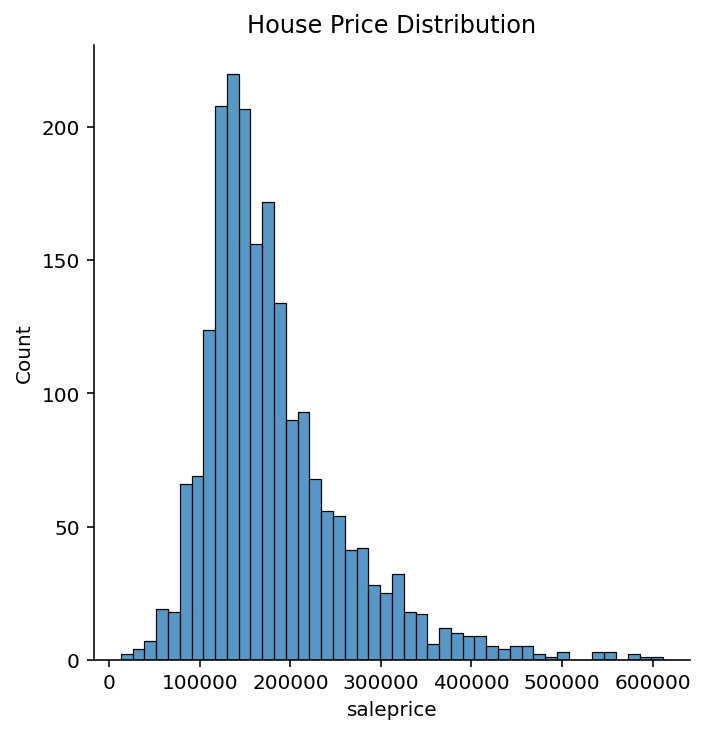

In [13]:
#delete later
plt.figure(figsize = (8,6))
sns.displot(y_axis)
plt.title('House Price Distribution');

### Numerical Features

In [14]:
train_data.corr()['saleprice'].sort_values(ascending=False)

saleprice          1.000000
overall_qual       0.800207
gr_liv_area        0.697038
garage_area        0.650270
garage_cars        0.648220
total_bsmt_sf      0.628925
1st_flr_sf         0.618486
year_built         0.571849
year_remod/add     0.550370
full_bath          0.537969
garage_yr_blt      0.533922
mas_vnr_area       0.512230
totrms_abvgrd      0.504014
fireplaces         0.471093
bsmtfin_sf_1       0.423519
lot_frontage       0.341842
open_porch_sf      0.333476
wood_deck_sf       0.326490
lot_area           0.296566
bsmt_full_bath     0.283662
half_bath          0.283001
2nd_flr_sf         0.248452
bsmt_unf_sf        0.190210
bedroom_abvgr      0.137067
screen_porch       0.134581
3ssn_porch         0.048732
mo_sold            0.032735
pool_area          0.023106
bsmtfin_sf_2       0.016255
misc_val          -0.007375
yr_sold           -0.015203
low_qual_fin_sf   -0.041594
bsmt_half_bath    -0.045328
ms_subclass       -0.087335
overall_cond      -0.097019
kitchen_abvgr     -0

Based on the correlation coefficient above, the top 5 most significant features in determining house price are 'Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', and 'Total Bsmt SF'. <br>
We will study more about these features below.

### Finding Outliers

#### 'Overall Qual' : Rates the overall material and finish of the house

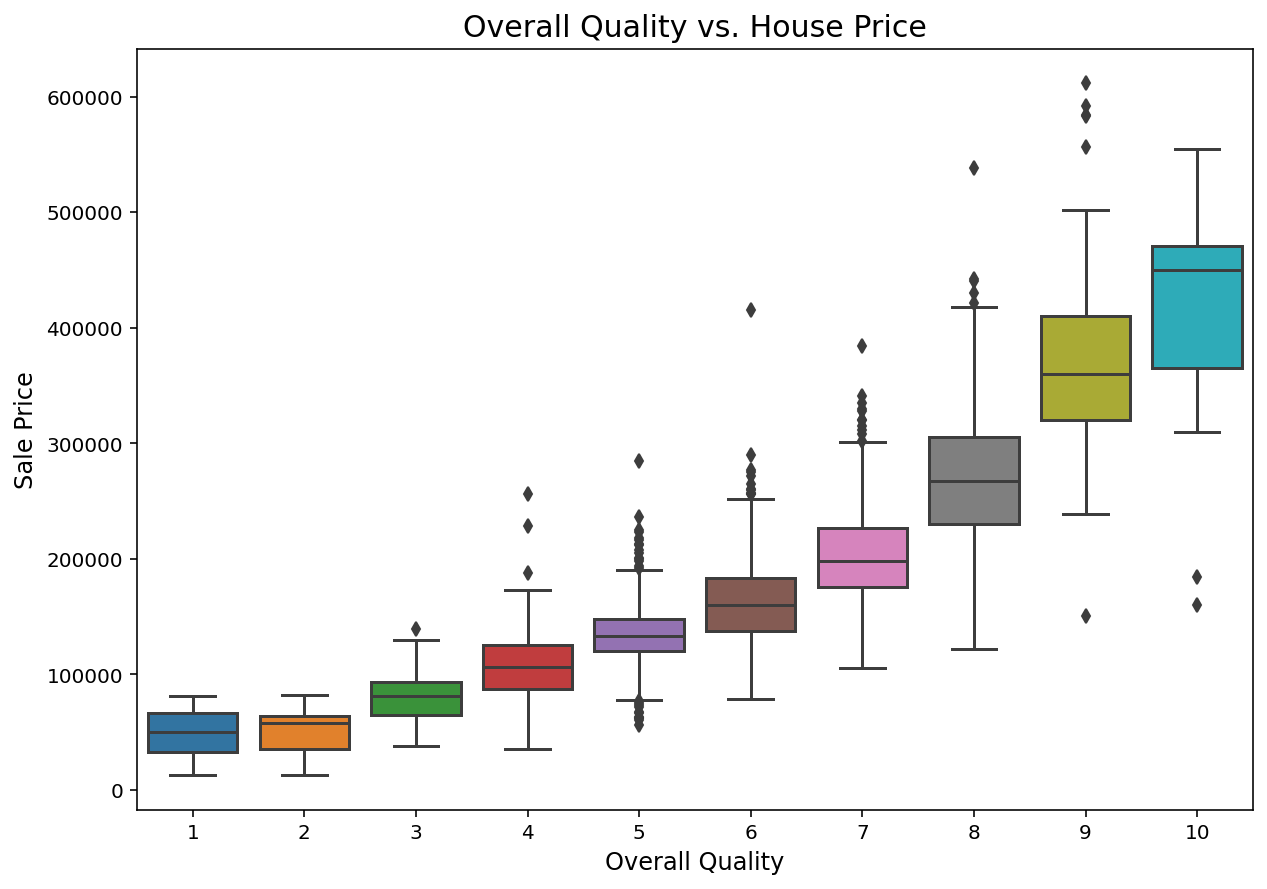

In [15]:
plt.figure(figsize = (10, 7))
sns.boxplot(x='overall_qual', y='saleprice', data=train_data)
plt.xlabel('Overall Quality', fontsize = 12)
plt.ylabel('Sale Price', fontsize = 12)
plt.title('Overall Quality vs. House Price', fontsize = 15);

Higher overall quality leads to higher sale price.

In [16]:
#3 outliers with overall quality >= 9 but sale price < 300000, need to remove??

#### 'Gr Liv Area' : Above grade (ground) living area square feet

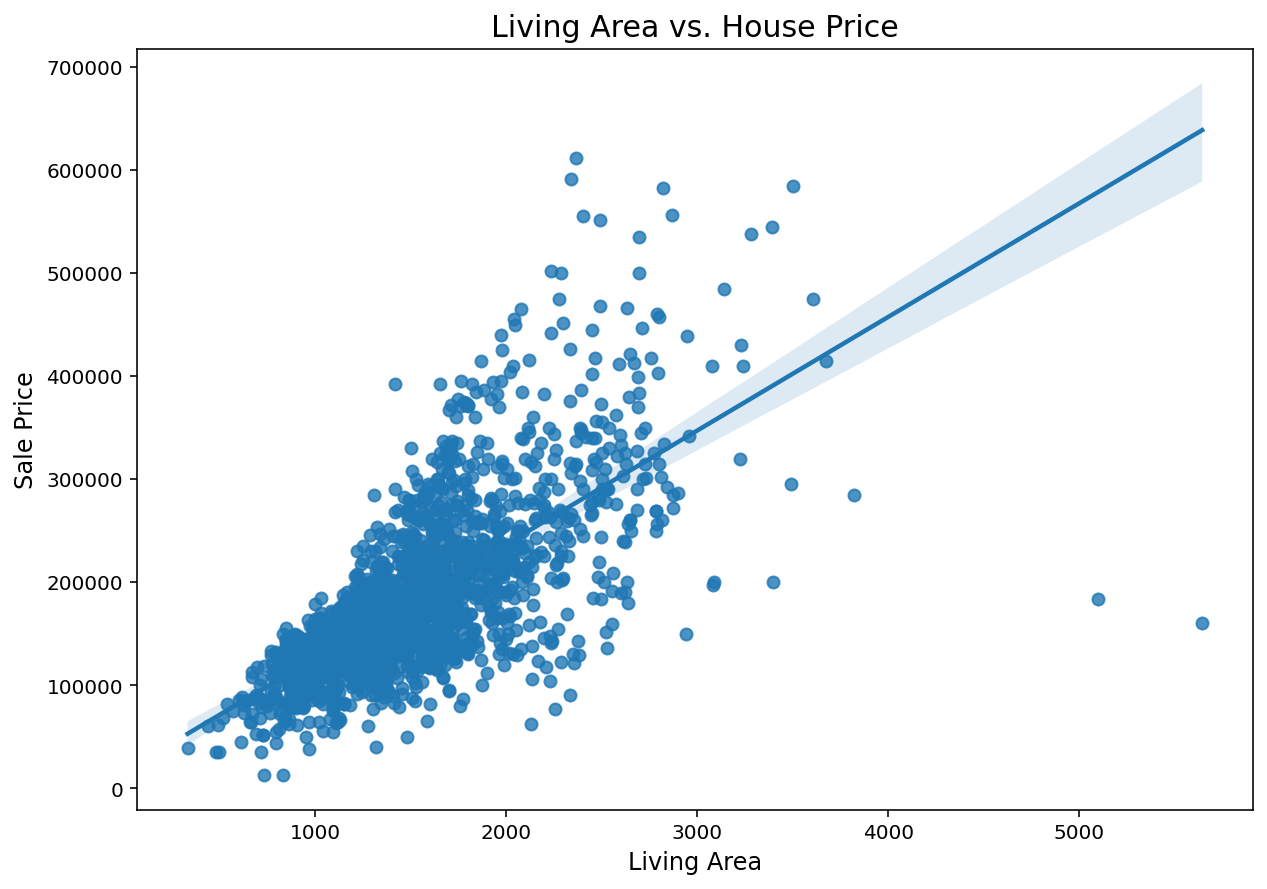

In [17]:
plt.figure(figsize = (10, 7))
sns.regplot(x='gr_liv_area', y='saleprice', data=train_data)
plt.xlabel('Living Area', fontsize = 12)
plt.ylabel('Sale Price', fontsize = 12)
plt.title('Living Area vs. House Price', fontsize = 15);

We can observe a general pattern whereby the price of a house increases with the size of the living area. However, two outliers with a large living area but a low price may be seen at the bottom right of the plot. Hence, we will remove these 2 extreme outliers.

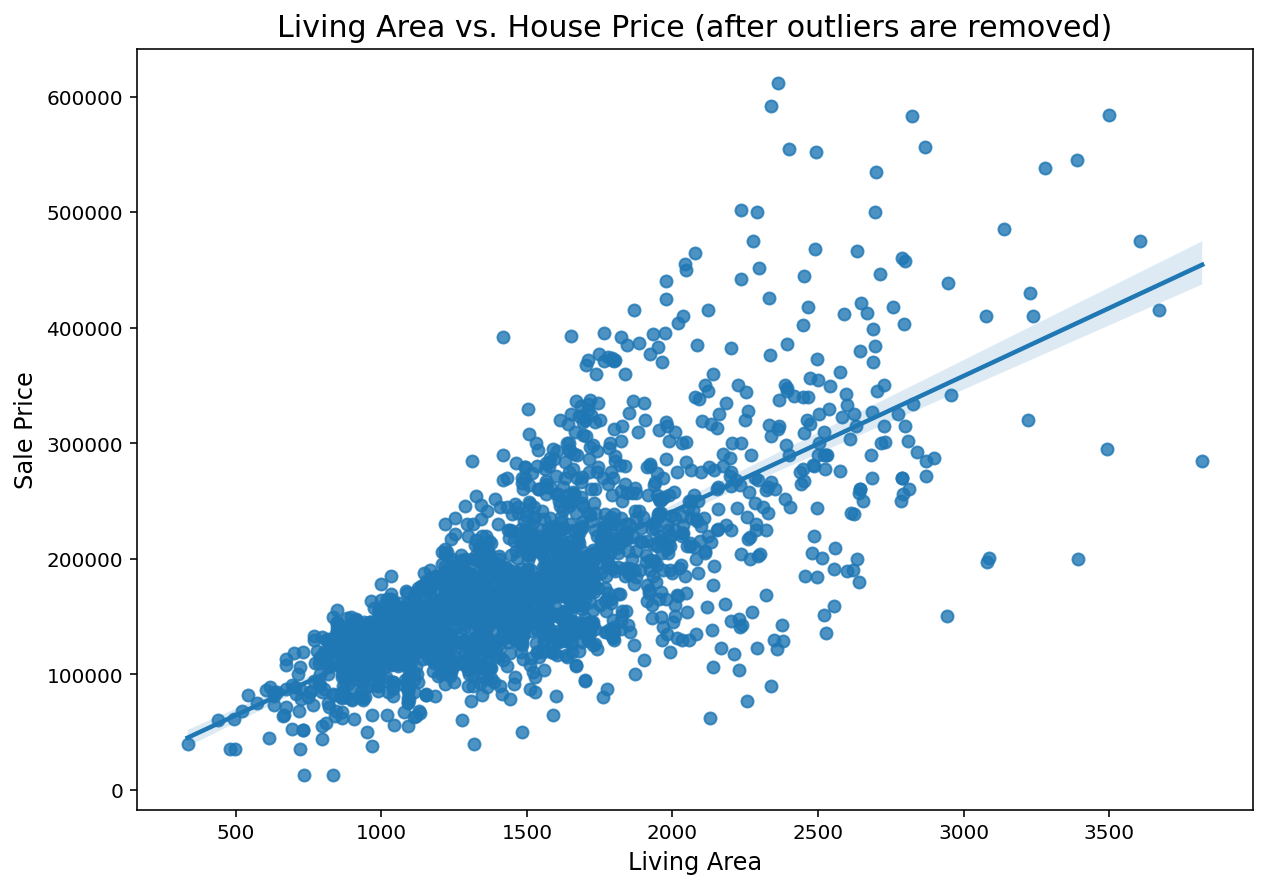

In [18]:
#Removing outliers:
outliers_index = train_data[(train_data['gr_liv_area']>4000) & 
                            (train_data['saleprice']<200_000)].index
train_data.drop(outliers_index, inplace = True)

#Check the graph after the outliers have been removed:
plt.figure(figsize = (10, 7))
sns.regplot(x='gr_liv_area', y='saleprice', data=train_data)
plt.xlabel('Living Area', fontsize = 12)
plt.ylabel('Sale Price', fontsize = 12)
plt.title('Living Area vs. House Price (after outliers are removed)', fontsize = 15);

Text(0.5, 1.0, 'Gr Liv Area vs Saleprice by neighborhood')

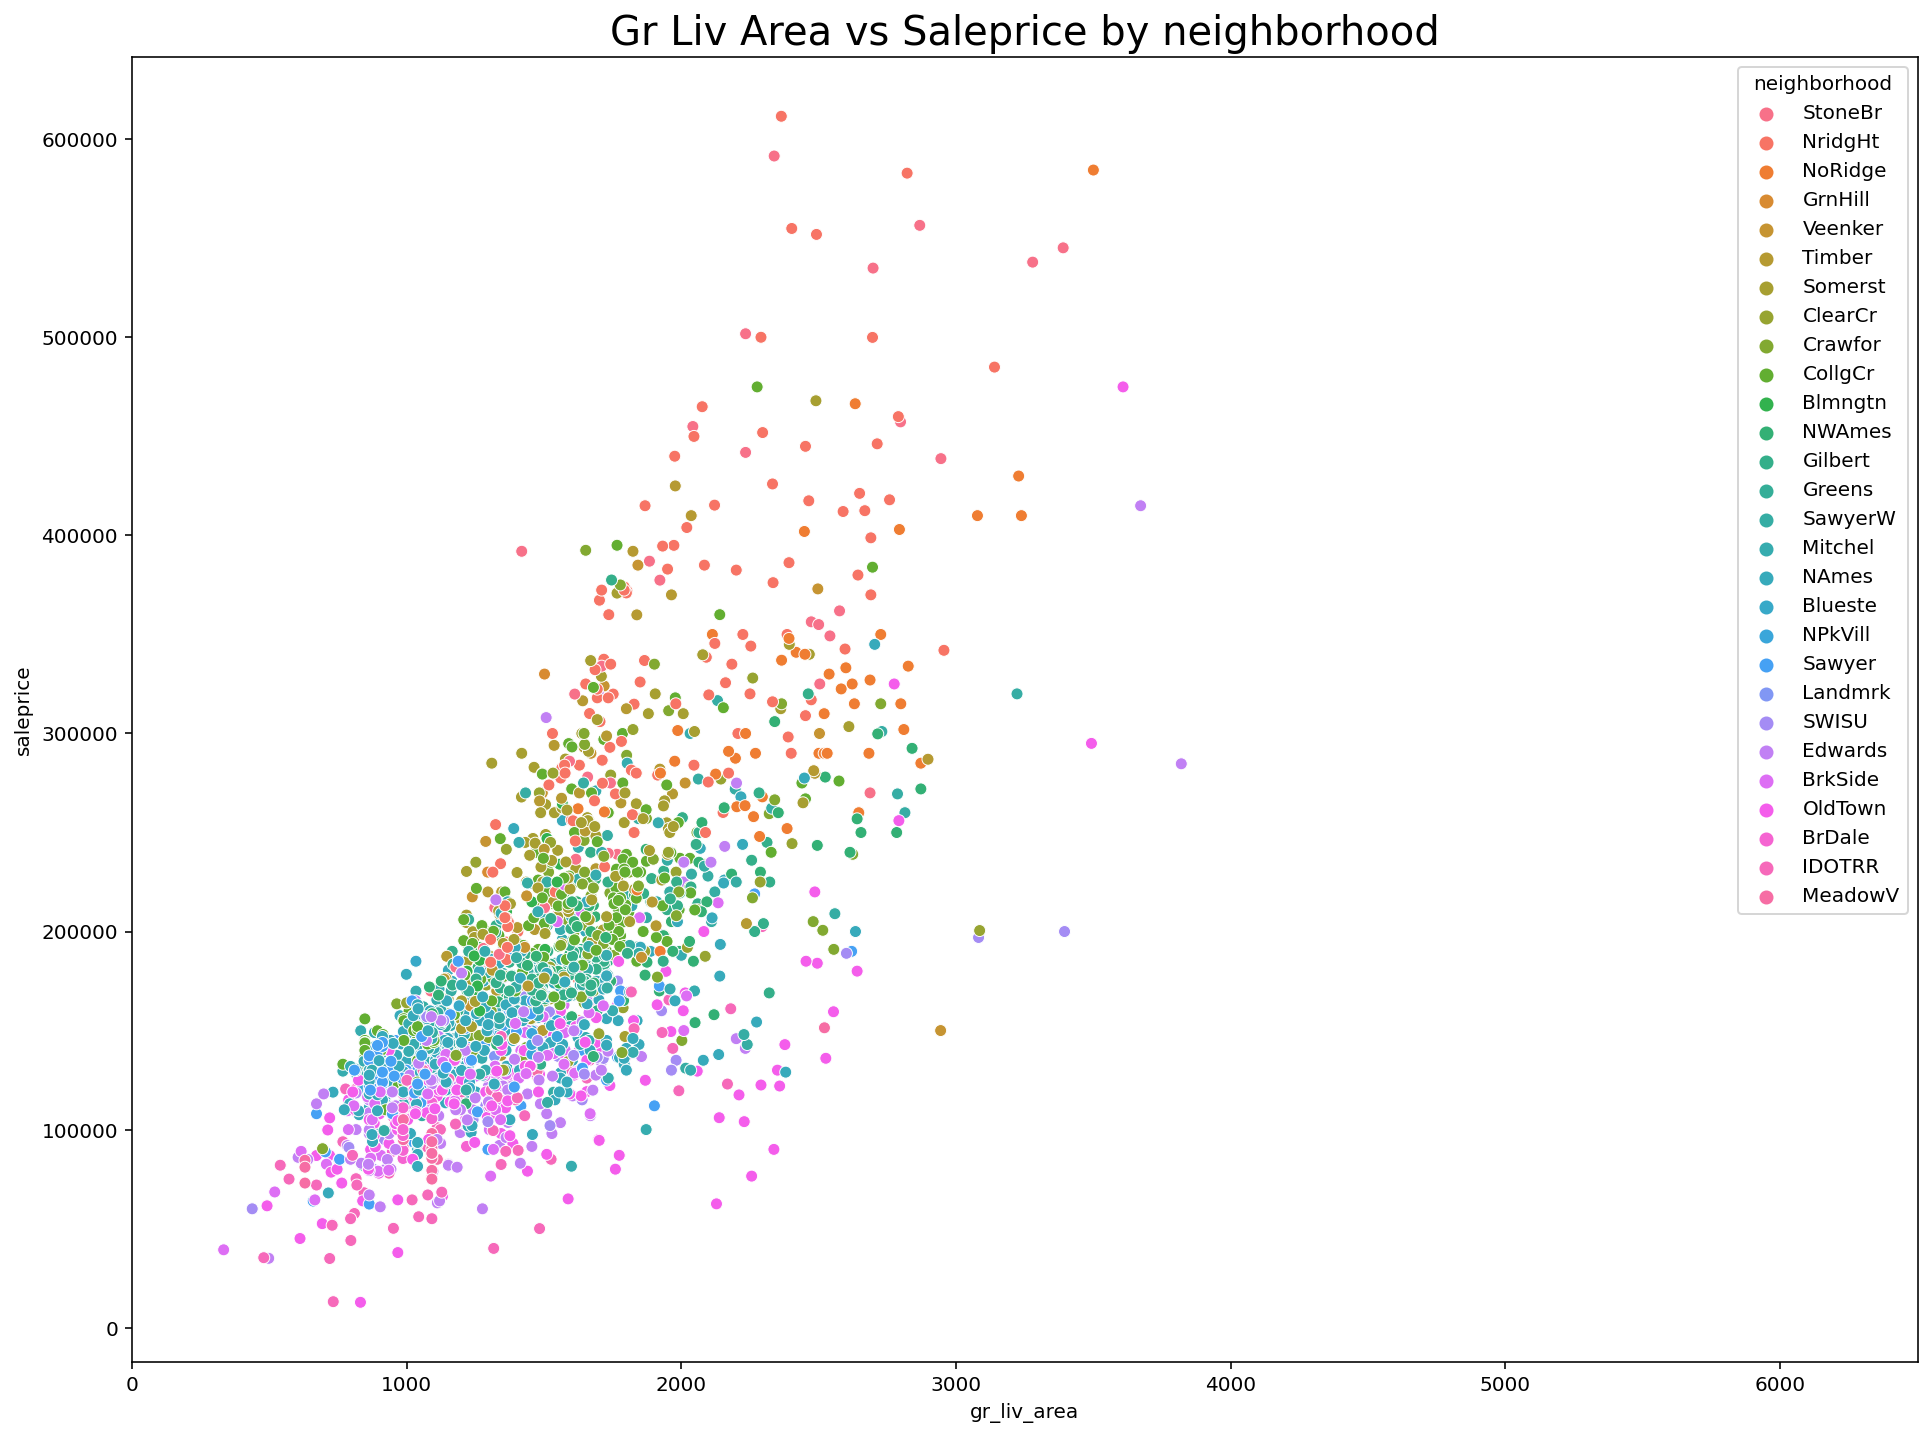

In [19]:
#delete - paraphrase!!
#sorting the neighborhood by mean saleprice
price_by_neighborhood = train_data.groupby('neighborhood')['saleprice'].describe().sort_values('mean',ascending=False)

#Plotting the 'Gr Liv Area' vs 'SalePrice'
#The hue is sorted by the mean neighborhood price
plt.figure(figsize=(16,12))
sns.scatterplot(y='saleprice', x='gr_liv_area', hue='neighborhood',
                hue_order=list(price_by_neighborhood.T.columns),
                data=train_data).set_xlim(0,6500)
plt.title('Gr Liv Area vs Saleprice by neighborhood', fontsize=20)

**Reference:**
- [How to Remove Outliers for Machine Learning?](https://medium.com/analytics-vidhya/how-to-remove-outliers-for-machine-learning-24620c4657e8#:~:text=If%20the%20outliers%20are%20non,and%20other%20statistical%20model%20assumptions.)

#### 'Garage Area' : Size of garage in square feet

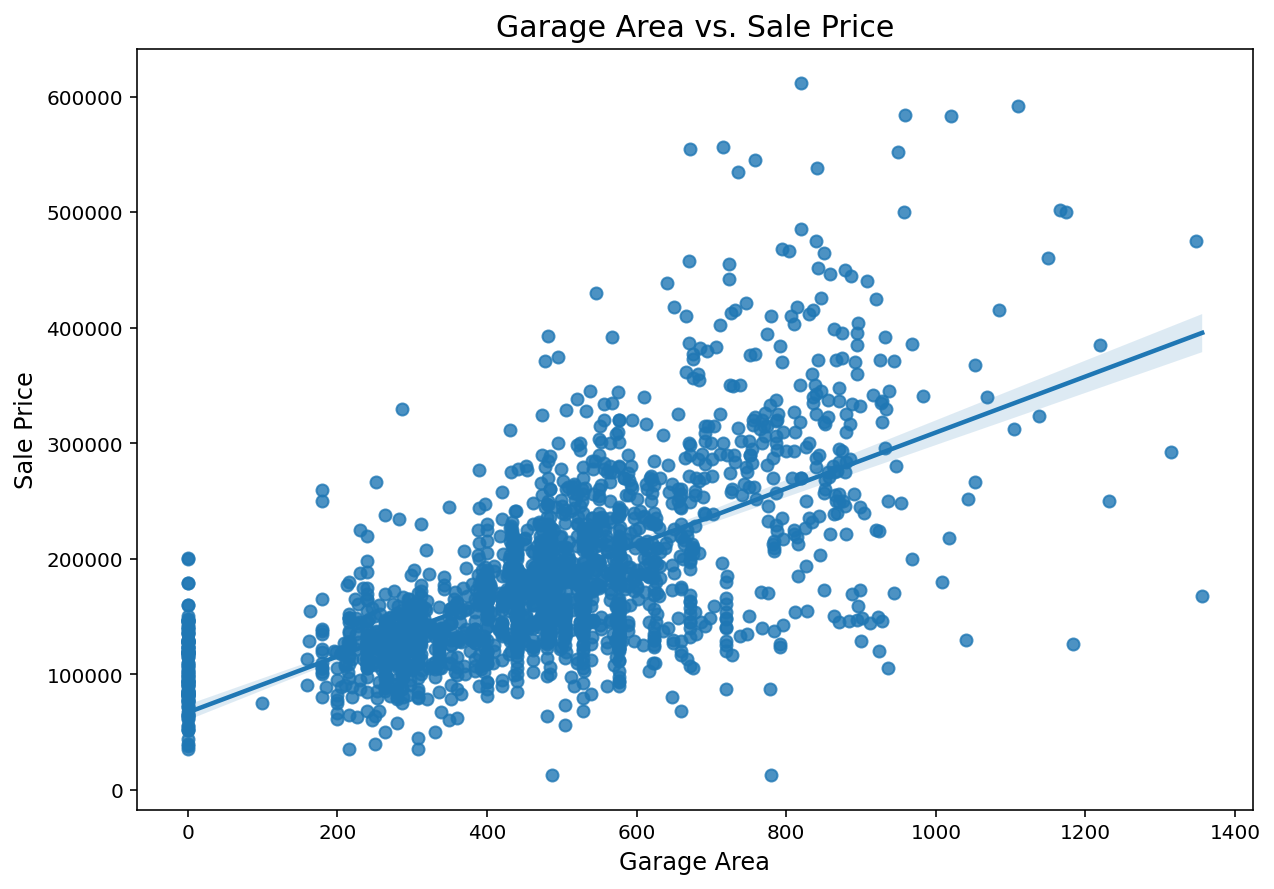

In [20]:
plt.figure(figsize = (10, 7))
sns.regplot(x='garage_area', y='saleprice', data=train_data)
plt.xlabel('Garage Area', fontsize = 12)
plt.ylabel('Sale Price', fontsize = 12)
plt.title('Garage Area vs. Sale Price', fontsize = 15);

#### 'Garage Cars' : Size of garage in car capacity

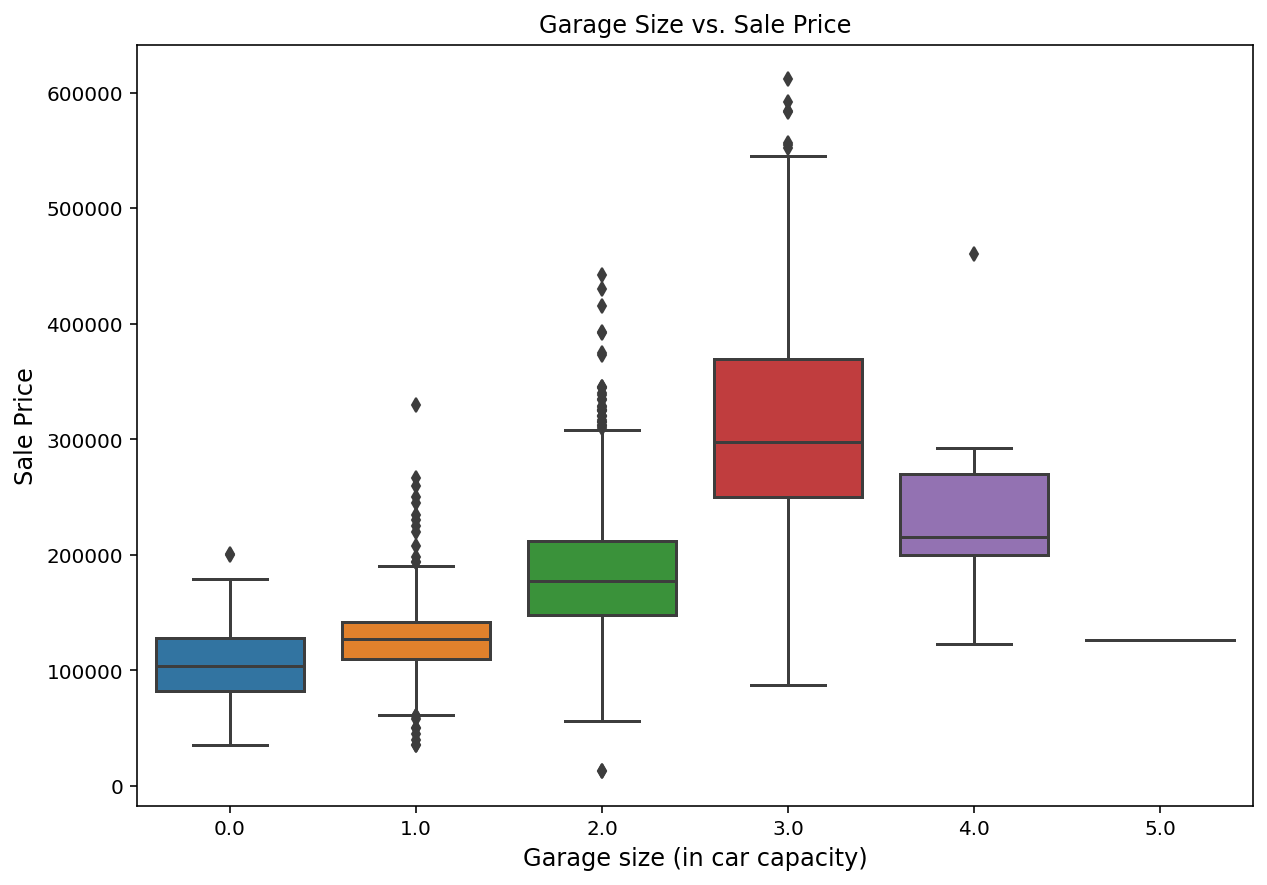

In [21]:
plt.figure(figsize = (10, 7))
sns.boxplot(x='garage_cars', y='saleprice', data=train_data)
plt.xlabel('Garage size (in car capacity)', fontsize = 12)
plt.ylabel('Sale Price', fontsize = 12)
plt.title('Garage Size vs. Sale Price');

#### 'Total Bsmt SF' : Total square feet of basement area

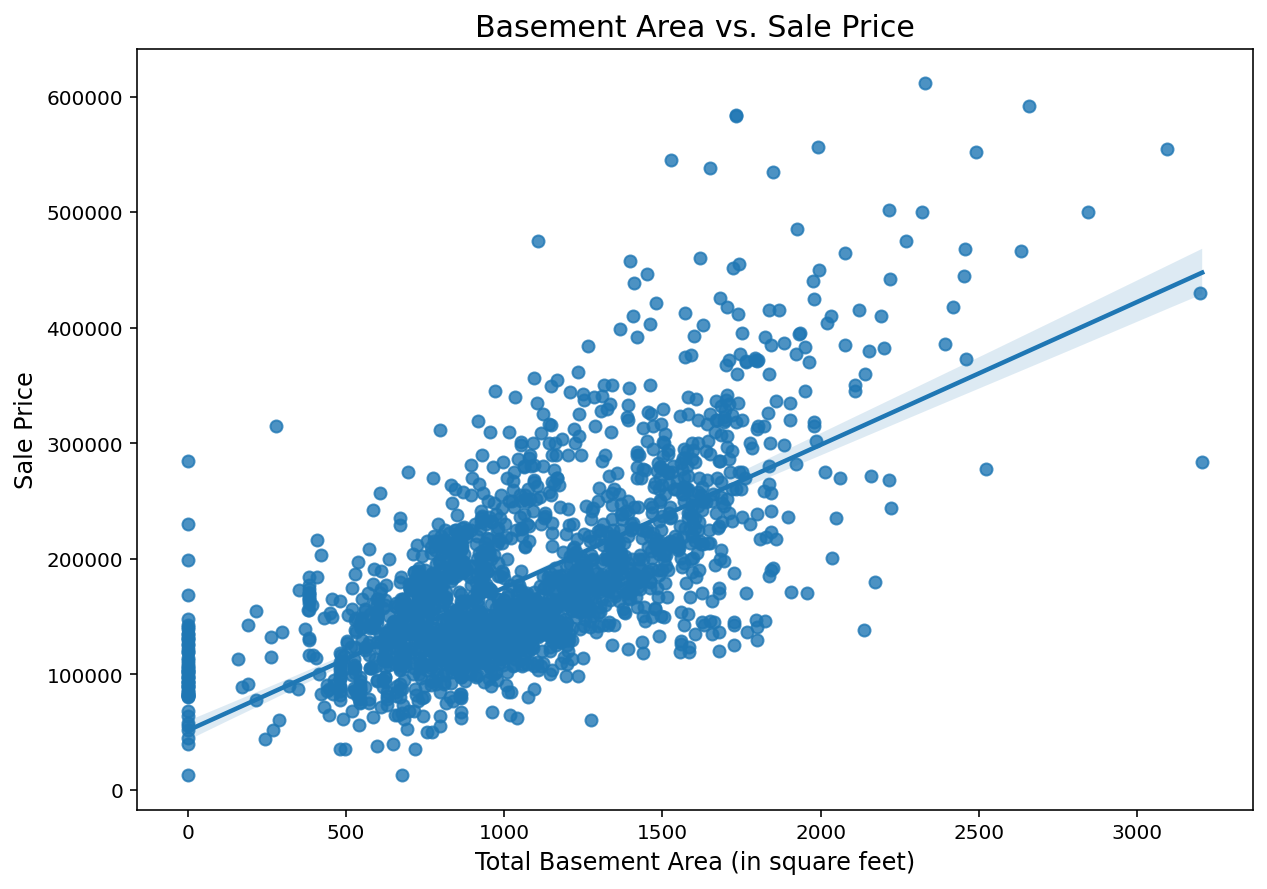

In [22]:
plt.figure(figsize = (10, 7))
sns.regplot(x='total_bsmt_sf', y='saleprice', data=train_data)
plt.xlabel('Total Basement Area (in square feet)', fontsize = 12)
plt.ylabel('Sale Price', fontsize = 12)
plt.title('Basement Area vs. Sale Price', fontsize = 15);

### Categorical Features

- neighborhood

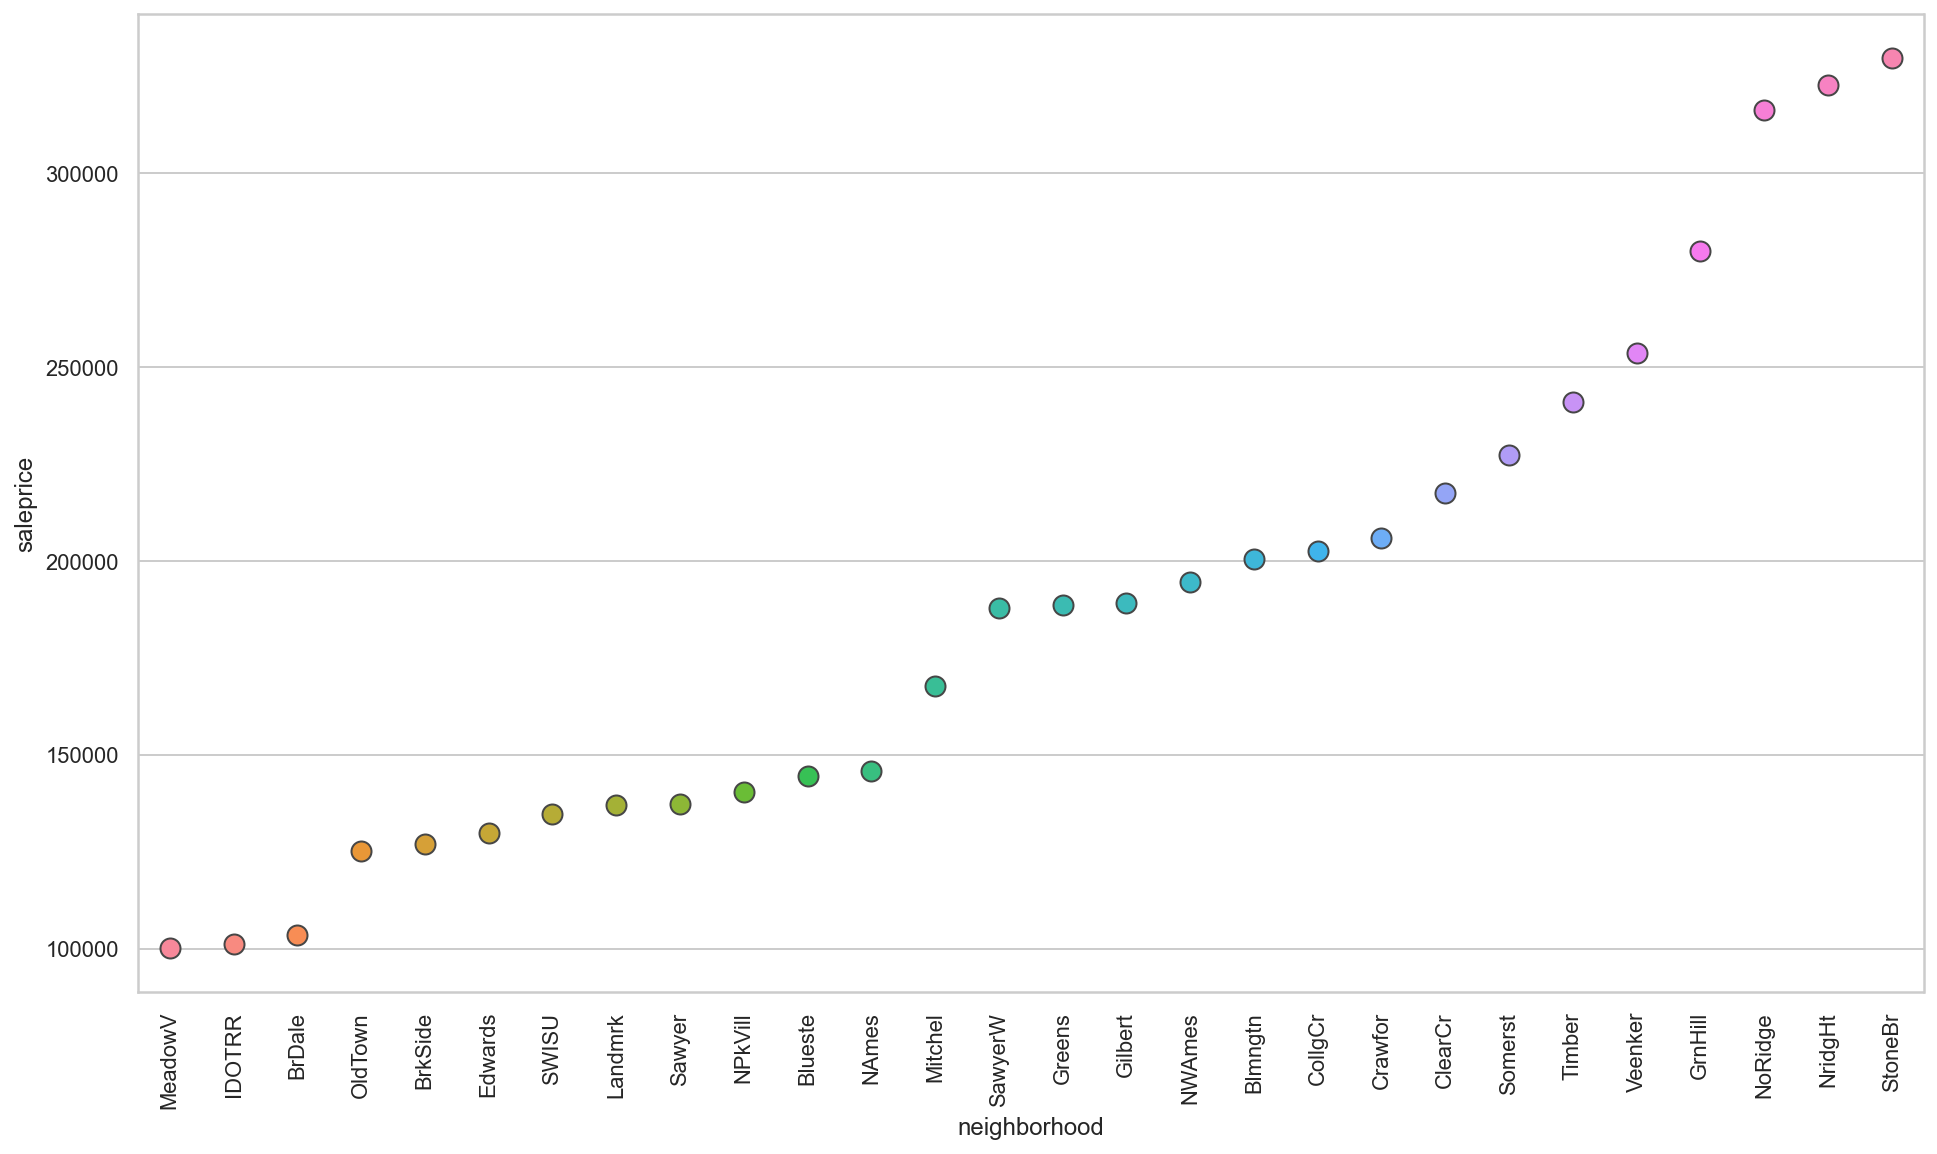

In [23]:
#Plotting the mean saleprice of each neighborhood
plt.figure(figsize=(16,9))
sns.set(style="whitegrid")
sns.swarmplot(y=train_data.groupby('neighborhood')['saleprice'].mean().sort_values(), 
              x=train_data.groupby('neighborhood')['saleprice'].mean().sort_values().index,
              size=10,linewidth=1)
plt.xticks(rotation=90);

## 3. Data Preprocessing and Feature Engineering
---

**Reference:** [Step by Step process of Feature Engineering for Machine Learning Algorithms in Data Science](https://www.analyticsvidhya.com/blog/2021/03/step-by-step-process-of-feature-engineering-for-machine-learning-algorithms-in-data-science/)

In [24]:
print(f"Size of train_data : {train_data.shape}")
print(f"Size of test_data : {test_data.shape}")

#Concatenate the train and test data into the same dataframe:
#no. of rows in train and test data:
n_train = train_data.shape[0]
n_test = test_data.shape[0]

#drop sale price column from train_data:
train_test = pd.concat([train_data.drop(['saleprice'],axis=1), test_data])

#Check the size of combined dataframe:
print(f"Size of combined dataframe: {train_test.shape}")

Size of train_data : (2049, 79)
Size of test_data : (878, 78)
Size of combined dataframe: (2927, 78)


In [25]:
train = train_data.copy()
test = test_data.copy()

In [26]:
train.shape, test.shape

((2049, 79), (878, 78))

### Handling Missing Values

### Check for percentage of missing values

In [27]:
all_na_percent = train_test.isnull().sum()/len(train_test)*100
all_na = pd.DataFrame({'missing_percentage' : all_na_percent[all_na_percent > 0]})
all_na = all_na.sort_values(by = 'missing_percentage' ,ascending = False)
all_na

missing_percentage
pool_qc                  99.590024
misc_feature             96.412709
alley                    93.235395
fence                    80.457807
fireplace_qu             48.582166
lot_frontage             16.740690
garage_cond               5.432183
garage_qual               5.432183
garage_finish             5.432183
garage_yr_blt             5.432183
garage_type               5.363854
bsmt_exposure             2.835668
bsmtfin_type_2            2.767339
bsmtfin_type_1            2.733174
bsmt_qual                 2.733174
bsmt_cond                 2.733174
mas_vnr_area              0.785787
mas_vnr_type              0.785787
bsmt_half_bath            0.068329
bsmt_full_bath            0.068329
total_bsmt_sf             0.034165
bsmt_unf_sf               0.034165
garage_cars               0.034165
garage_area               0.034165
bsmtfin_sf_2              0.034165
bsmtfin_sf_1              0.034165
electrical                0.034165

Text(0.5, 1.0, 'Missing Values by Features')

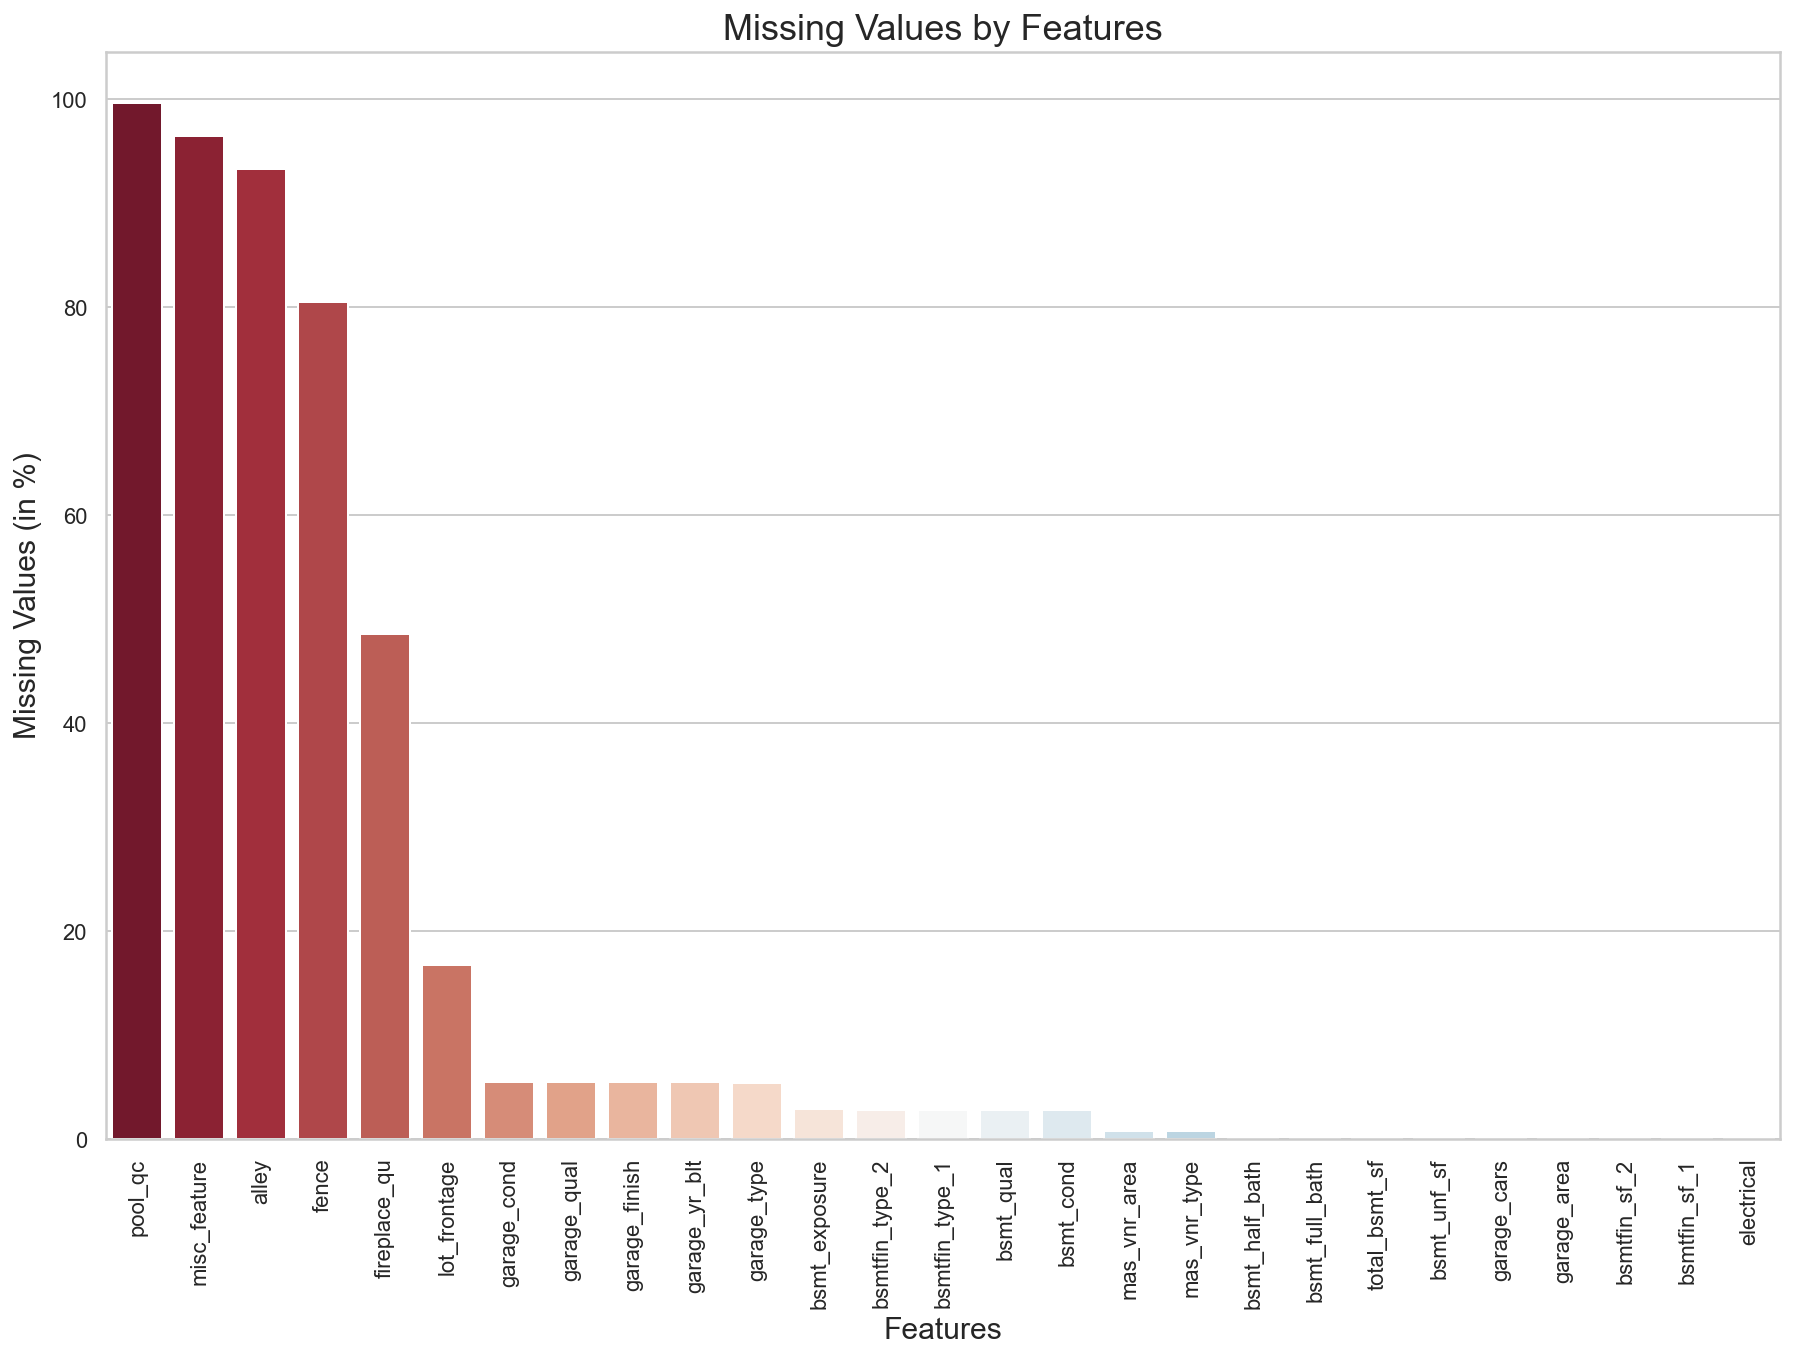

In [28]:
plt.figure(figsize=(15,10))
plt.xticks(rotation = '90')
sns.barplot(x = all_na.index, y=all_na['missing_percentage'], palette='RdBu');
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Missing Values (in %)', fontsize = 15)
plt.title('Missing Values by Features', fontsize = 18)

In [29]:
all_na.index

Index(['pool_qc', 'misc_feature', 'alley', 'fence', 'fireplace_qu',
       'lot_frontage', 'garage_cond', 'garage_qual', 'garage_finish',
       'garage_yr_blt', 'garage_type', 'bsmt_exposure', 'bsmtfin_type_2',
       'bsmtfin_type_1', 'bsmt_qual', 'bsmt_cond', 'mas_vnr_area',
       'mas_vnr_type', 'bsmt_half_bath', 'bsmt_full_bath', 'total_bsmt_sf',
       'bsmt_unf_sf', 'garage_cars', 'garage_area', 'bsmtfin_sf_2',
       'bsmtfin_sf_1', 'electrical'],
      dtype='object')

### Imputing missing values

### A. **Categorical features**

In [30]:
#NA might mean no features

#### Nominal Features

- pool_qc (NA = No Pool)

- misc_feature

In [31]:
train['misc_feature'] = train['misc_feature'].fillna('NoMF')
test['misc_feature'] = test['misc_feature'].fillna('NoMF')

- alley

In [32]:
train['alley'] = train['alley'].fillna('NoAlley')
test['alley'] = test['alley'].fillna('NoAlley')

- fence (NA = No Fence)

- fireplace_qu (NA = No Fireplace) 

- Features related to garage : garage_cond, garage_qual, garage_finish, garage_type (NA = No Garage)

In [33]:
train['garage_type'] = train['garage_type'].fillna('NoGarage')
test['garage_type'] = test['garage_type'].fillna('NoGarage')

- Features related to basement : bsmt_exposure, bsmtfin_type_1, bsmtfin_type_2, bsmt_qual, bsmt_cond (NA = No Basement)

- mas_vnr_type

In [34]:
train['mas_vnr_type'] = train['mas_vnr_type'].fillna('NoMV')
test['mas_vnr_type'] = test['mas_vnr_type'].fillna('NoMV')

#### Ordinal Variables

In [35]:
train['bsmt_qual'] = train['bsmt_qual'].map({np.nan:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train['bsmt_cond'] = train['bsmt_cond'].map({np.nan:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train['bsmt_exposure'] = train['bsmt_exposure'].map({np.nan:0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
train['bsmtfin_type_1'] = train['bsmtfin_type_1'].map({np.nan:0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
train['bsmtfin_type_2'] = train['bsmtfin_type_2'].map({np.nan:0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
train['fireplace_qu'] = train['fireplace_qu'].map({np.nan:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train['garage_finish'] = train['garage_finish'].map({np.nan:0, 'Unf':1, 'RFn':2, 'Fin':3})
train['garage_qual'] = train['garage_qual'].map({np.nan:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train['garage_cond'] = train['garage_cond'].map({np.nan:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train['pool_qc'] = train['pool_qc'].map({np.nan: 0, 'Fa': 1, 'TA': 2, 'Gd':3, 'Ex':4})
train['fence'] = train['fence'].map({np.nan: 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv':3, 'GdPrv':4})

train['lot_shape'] = train['lot_shape'].map({'IR3':1, 'IR2':2, 'IR1':3, 'Reg':4})
train['utilities'] = train['utilities'].map({'NoSeWa':1, 'NoSewr':2, 'AllPub':3})

train['land_slope'] = train['land_slope'].map({'Sev':1, 'Mod':2, 'Gtl':3})
train['exter_qual'] = train['exter_qual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train['exter_cond'] = train['exter_cond'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train['heating_qc'] = train['heating_qc'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
train['electrical'] = train['electrical'].map({np.nan:0, 'Mix':1, 'FuseP':2, 'FuseF':3, 'FuseA':4, 'SBrkr':5})
train['kitchen_qual'] = train['kitchen_qual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

train['functional'] = train['functional'].map({'Typ':0, 'Min1': -1, 'Min2': -2, 'Mod':-3,
                                               'Maj1':-4, 'Maj2':-5, 'Sev':-6, 'Sal':-7})
train['paved_drive'] = train['paved_drive'].map({'N':0, 'P':1, 'Y':2})

train['house_style'] = train['house_style'].map({'1Story':1, '1.5Unf':1.25, '1.5Fin':1.5, 
                                                 '2Story':2, '2.5Unf':2.25, '2.5Fin':2.5,
                                                'SFoyer':2, 'SLvl':3})

In [36]:
test['bsmt_qual'] = test['bsmt_qual'].map({np.nan:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test['bsmt_cond'] = test['bsmt_cond'].map({np.nan:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test['bsmt_exposure'] = test['bsmt_exposure'].map({np.nan:0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
test['bsmtfin_type_1'] = test['bsmtfin_type_1'].map({np.nan:0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
test['bsmtfin_type_2'] = test['bsmtfin_type_2'].map({np.nan:0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
test['fireplace_qu'] = test['fireplace_qu'].map({np.nan:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test['garage_finish'] = test['garage_finish'].map({np.nan:0, 'Unf':1, 'RFn':2, 'Fin':3})
test['garage_qual'] = test['garage_qual'].map({np.nan:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test['garage_cond'] = test['garage_cond'].map({np.nan:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test['pool_qc'] = test['pool_qc'].map({np.nan: 0, 'Fa': 1, 'TA': 2, 'Gd':3, 'Ex':4})
test['fence'] = test['fence'].map({np.nan: 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv':3, 'GdPrv':4})

test['lot_shape'] = test['lot_shape'].map({'IR3':1, 'IR2':2, 'IR1':3, 'Reg':4})
test['utilities'] = test['utilities'].map({'NoSeWa':1, 'NoSewr':2, 'AllPub':3})

test['land_slope'] = test['land_slope'].map({'Sev':1, 'Mod':2, 'Gtl':3})
test['exter_qual'] = test['exter_qual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test['exter_cond'] = test['exter_cond'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test['heating_qc'] = test['heating_qc'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
test['electrical'] = test['electrical'].map({np.nan:0, 'Mix':1, 'FuseP':2, 'FuseF':3, 'FuseA':4, 'SBrkr':5})
test['kitchen_qual'] = test['kitchen_qual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

test['functional'] = test['functional'].map({'Typ':0, 'Min1': -1, 'Min2': -2, 'Mod':-3,
                                               'Maj1':-4, 'Maj2':-5, 'Sev':-6, 'Sal':-7})
test['paved_drive'] = test['paved_drive'].map({'N':0, 'P':1, 'Y':2})

test['house_style'] = test['house_style'].map({'1Story':1, '1.5Unf':1.25, '1.5Fin':1.5, 
                                                 '2Story':2, '2.5Unf':2.25, '2.5Fin':2.5,
                                                'SFoyer':2, 'SLvl':3})

### B. **Numerical features**

In [37]:
#NA might mean no features

- garage_cars, garage_area,  bsmtfin_sf_1, bsmtfin_sf_2, bsmt_unf_sf, total_bsmt_sf, bsmt_half_bath, bsmt_full_bath,  mas_vnr_area

In [38]:
#to do:
#check: if basement is unfinished / NA, area = 0
# na_num = ['garage_cars', 'garage_area', 
#           'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 
#           'total_bsmt_sf', 'bsmt_half_bath', 'bsmt_full_bath', 
#           'mas_vnr_area']
# train[na_num] = train[na_num].fillna(0)
# test[na_num] = test[na_num].fillna(0)

In [39]:
na_num =['garage_cars', 'garage_area']
train[na_num] = train[na_num].fillna(0)
test[na_num] = test[na_num].fillna(0)

#### Discrete Variables

In [40]:
discrete_na = ['bsmt_full_bath', 'bsmt_half_bath', 'garage_yr_blt']
train[discrete_na] = train[discrete_na].fillna(0)
test[discrete_na] = test[discrete_na].fillna(0)

In [41]:
#missing = 'central_air'
train['central_air'].dtypes

dtype('O')

In [42]:
#eventhough 'central_air' is nominal based on the documentation, 
#the values are either 'Y' or 'N', so we can map it to 1 or 0.
train['central_air'] = train['central_air'].map({'Y':1, 'N':0})
test['central_air'] = test['central_air'].map({'Y':1, 'N':0})

#### Continuous Variables

In [43]:
# lot_frontage

continuous_na = ['mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf']
train[continuous_na] = train[continuous_na].fillna(0)
test[continuous_na] = test[continuous_na].fillna(0)

### C. Imputing with Simple Imputer in sklearn

**Note:** Train-test-split BEFORE doing this if you are going to model later to avoid data leakage!

- lot_frontage

In [44]:
train['lot_frontage'].isnull().sum(),test['lot_frontage'].isnull().sum()

(330, 160)

In [45]:
#this is imputing without Simple Imputer
# lf_mean = train['lot_frontage'].mean()
# train.loc[:,'lot_frontage'].fillna(lf_mean, inplace = True)
# test.loc[:,'lot_frontage'] = test.loc[:,'lot_frontage'].fillna(lf_mean)

# train['lot_frontage'].reset_index(drop=True)

In [46]:
imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imp = imp.fit(train[['lot_frontage']])
train['lot_frontage'] = imp.transform(train[['lot_frontage']])
test['lot_frontage'] = imp.transform(test[['lot_frontage']])

In [47]:
train['lot_frontage'].isnull().sum(),test['lot_frontage'].isnull().sum()

(0, 0)

- garage_yr_built

In [48]:
# train['garage_yr_blt'] = train['garage_yr_blt'].fillna(train['year_built'])

In [49]:
# test['garage_yr_blt'] = test['garage_yr_blt'].fillna(test['year_built'])

- electrical

In [50]:
# imputer = SimpleImputer(strategy='most_frequent')
# train[['electrical']] = imputer.fit_transform(train[['electrical']])
# test[['electrical']] = imputer.fit(test[['electrical']])

In [51]:
#check if there is still missing values
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

### Feature Engineering

In [52]:
#Get list of categorical columns:
train.select_dtypes(include=['object']).columns.tolist()

['ms_zoning',
 'street',
 'alley',
 'land_contour',
 'lot_config',
 'neighborhood',
 'condition_1',
 'condition_2',
 'bldg_type',
 'roof_style',
 'roof_matl',
 'exterior_1st',
 'exterior_2nd',
 'mas_vnr_type',
 'foundation',
 'heating',
 'garage_type',
 'misc_feature',
 'sale_type']

####  Modify categorical columns

In [53]:
train['bsmt_qual'].value_counts()

3    887
4    864
5    182
2     60
0     55
1      1
Name: bsmt_qual, dtype: int64

In [54]:
# quality_cols = ['exter_qual', 'exter_cond', 'kitchen_qual', 'bsmt_qual',
#                'heating_qc', 'fireplace_qu', 'garage_qual', 'garage_cond',
#                'bsmt_cond', 'pool_qc']
# dict_rating = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}

- neighborhood

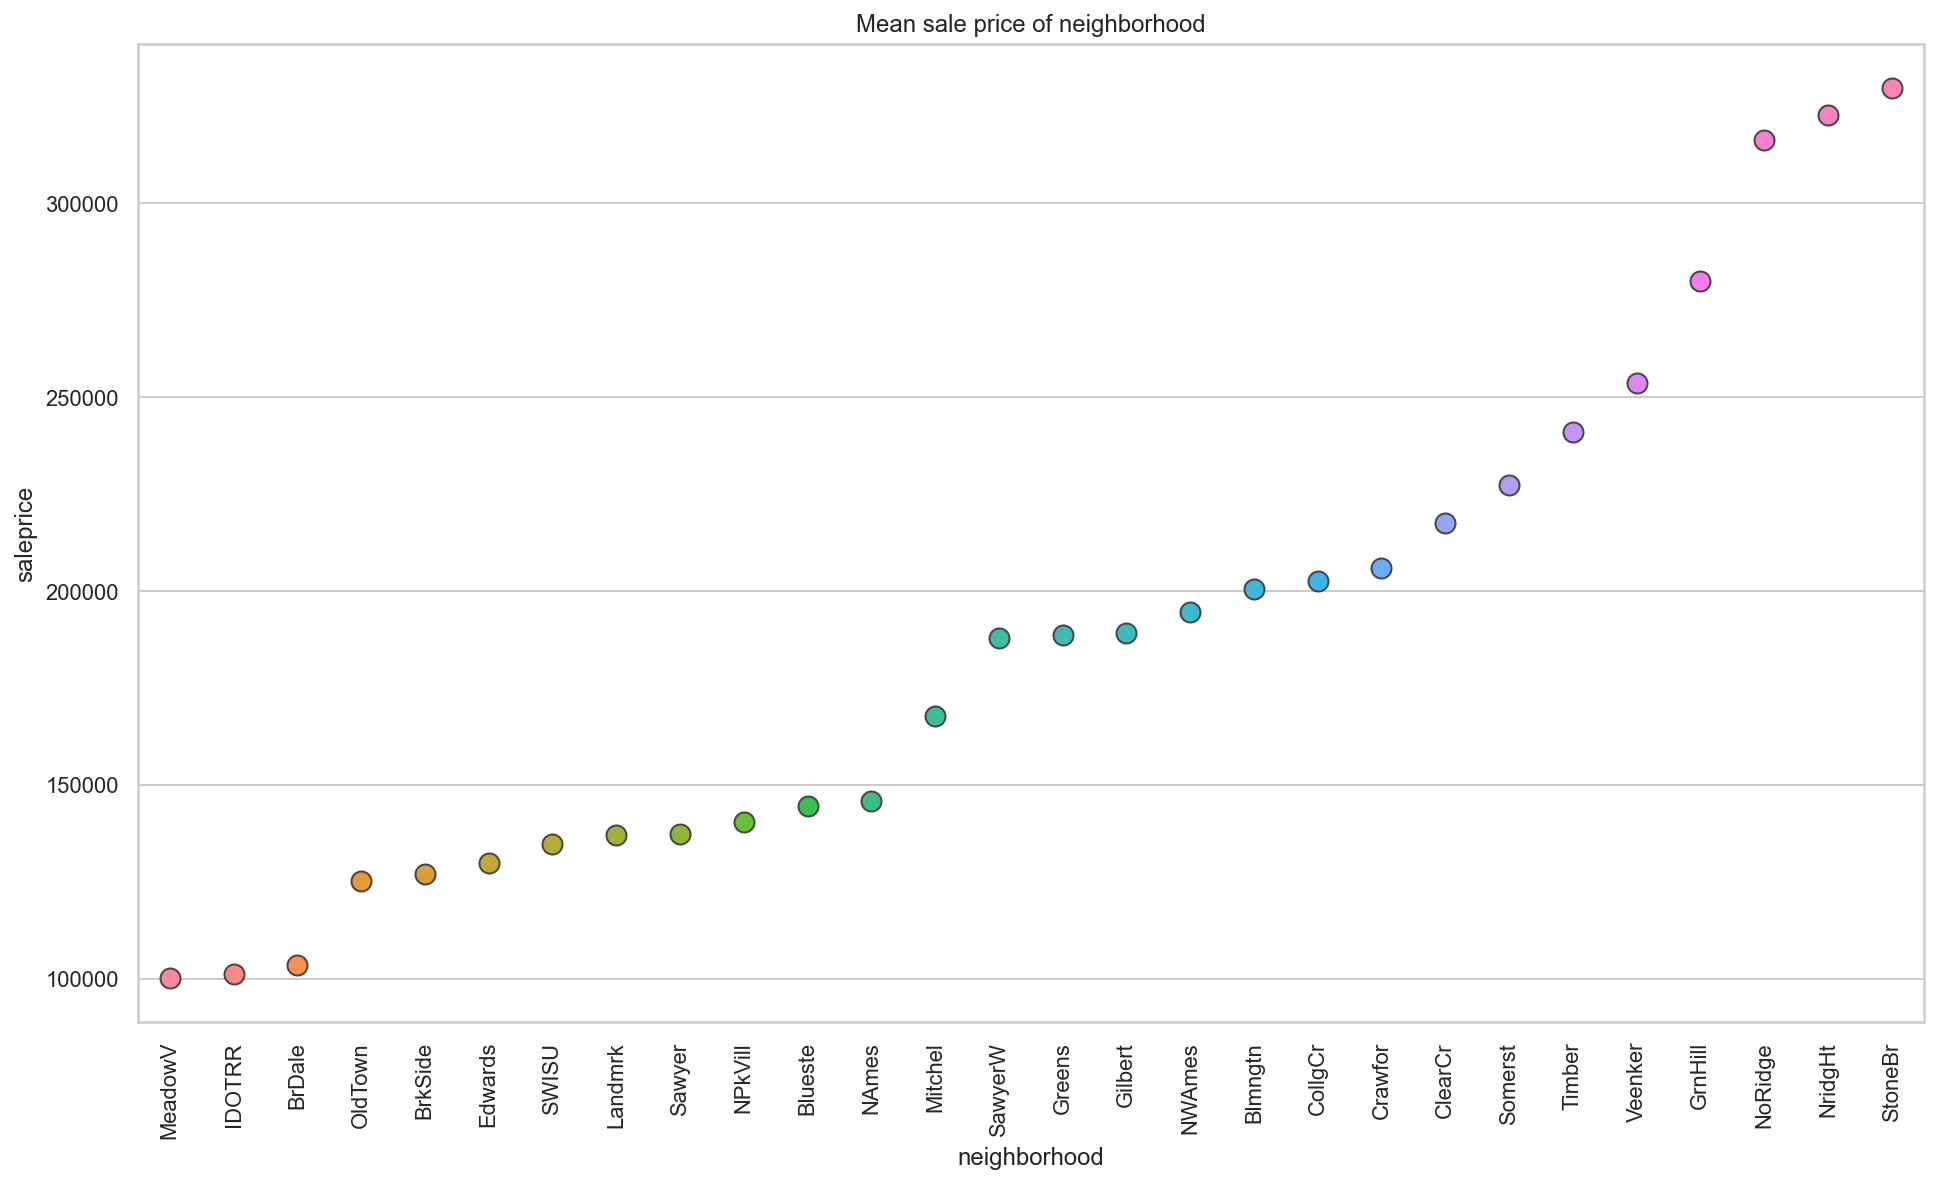

In [55]:
#Plotting the mean saleprice of each neighborhood
plt.figure(figsize=(16,9))
sns.set(style="whitegrid")
sns.swarmplot(y=train.groupby('neighborhood')['saleprice'].mean().sort_values(), 
              x=train.groupby('neighborhood')['saleprice'].mean().sort_values().index,
              size=10,linewidth=1)
plt.title('Mean sale price of neighborhood')
plt.xticks(rotation=90);

In [56]:
#transforming neighborhood into an ordinal category:
train['neighborhood'] = train['neighborhood'].map({'MeadowV':1, 'IDOTRR':1, 'BrDale':1,
                                                  'OldTown':2, 'BrkSide':2, 'Edwards':2,  
                                                  'SWISU':3, 'Landmrk':3,'Sawyer':3, 
                                                  'NPkVill':4, 'Blueste':4, 'NAmes':4,
                                                  'Mitchel':5,
                                                  'SawyerW':6, 'Greens':6, 'Gilbert':6, 'NWAmes':6, 
                                                  'Blmngtn':7,'CollgCr':7, 'Crawfor':7, 'ClearCr':7,
                                                   'Somerst':8, 'Timber':8,'Veenker':8,
                                                   'GrnHill':9,
                                                   'NoRidge':10, 'NridgHt':10, 'StoneBr':10})

test['neighborhood'] = test['neighborhood'].map({'MeadowV':1, 'IDOTRR':1, 'BrDale':1,
                                                  'OldTown':2, 'BrkSide':2, 'Edwards':2,  
                                                  'SWISU':3, 'Landmrk':3,'Sawyer':3, 
                                                  'NPkVill':4, 'Blueste':4, 'NAmes':4,
                                                  'Mitchel':5,
                                                  'SawyerW':6, 'Greens':6, 'Gilbert':6, 'NWAmes':6, 
                                                  'Blmngtn':7,'CollgCr':7, 'Crawfor':7, 'ClearCr':7,
                                                   'Somerst':8, 'Timber':8,'Veenker':8,
                                                   'GrnHill':9,
                                                   'NoRidge':10, 'NridgHt':10, 'StoneBr':10})

#### Create New Variables

In [57]:
#create a combination of features that has lower correlation with target variable
# when we sum up these variables, it can increase the relationship with target variable

In [58]:
train.shape, test.shape

((2049, 79), (878, 78))

In [59]:
#add ground floor
train['total_sq_feet'] = train['total_bsmt_sf'] + train['1st_flr_sf']  + train['2nd_flr_sf']
test['total_sq_feet'] = test['total_bsmt_sf'] + test['1st_flr_sf']  + test['2nd_flr_sf']

In [60]:
train['total_bathroom'] = train['full_bath'] + train['bsmt_full_bath'] + 0.5*(train['half_bath'] + train['bsmt_half_bath'])
test['total_bathroom'] = test['full_bath'] + test['bsmt_full_bath'] + 0.5*(test['half_bath'] + test['bsmt_half_bath'])

In [61]:
train['house_age'] = train['yr_sold'] - train['year_built']
test['house_age'] = test['yr_sold'] - test['year_built']

In [62]:
#additional
# train['remodeled'] = np.where(train['year_remod/add'] == train.year_built, 0, 1)
# test['remodeled'] = np.where(test['year_remod/add'] == test.year_built, 0, 1)

# train['is_new'] = np.where(train.yr_sold == train.year_built, 1, 0)
# test['is_new'] = np.where(test.yr_sold == test.year_built, 1, 0)

#the added features above are not very useful

In [63]:
#check added column:
train.shape, test.shape

((2049, 82), (878, 81))

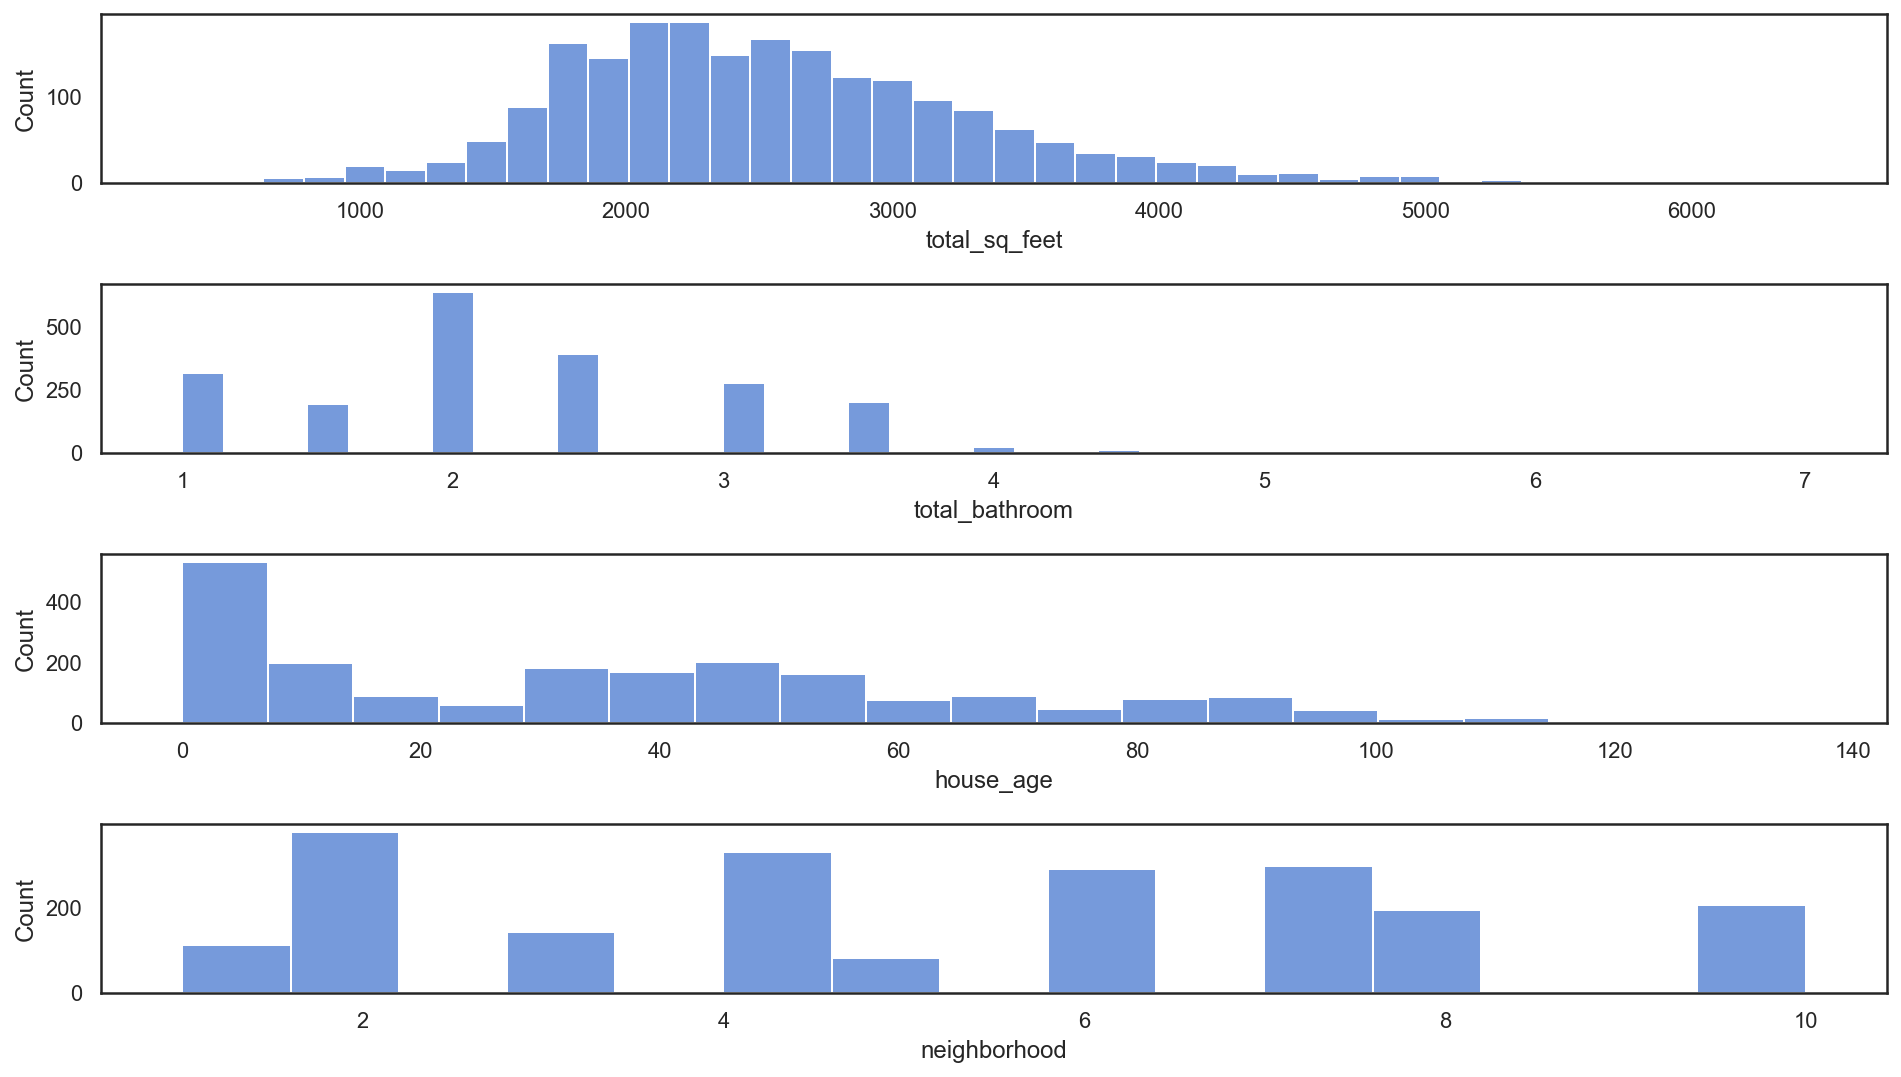

In [64]:
#Checking the distribution of these newly created variables

sns.set(style="white", palette="muted", color_codes=True)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16,9))
plt.subplots_adjust(hspace=0.6)
sns.histplot(train['total_sq_feet'], ax=ax1)
sns.histplot(train['total_bathroom'], ax=ax2)
sns.histplot(train['house_age'], ax=ax3)
sns.histplot(train['neighborhood'], ax=ax4);

#### Label Encoding

**Reference:**
[One-Hot Encoding vs. Label Encoding using Scikit-Learn](https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/#:~:text=Label%20Encoding%20is%20a%20popular,integer%20based%20on%20alphabetical%20ordering.)

In [65]:
#We apply label encoding for categorical feature that is ordinal

In [66]:
# #identify ordinal categorical columns:
# cat_ordinal = ['lot_shape', 'utilities', 'land_slope', 'exter_qual',
#        'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
#         'bsmtfin_type_1', 'bsmtfin_type_2', 'heating_qc', 'electrical',
#         'kitchen_qual', 'functional','fireplace_qu', 'garage_finish', 
#         'garage_qual', 'garage_cond', 'paved_drive', 'pool_qc', 'fence']

# #apply label encoder
# label_encoder = LabelEncoder()

# for col in cat_ordinal:
#     train[col] = label_encoder.fit_transform(train[col])
    

In [67]:
# not doing this because it might give the wrong ordering for the values of the features

#### Transform Numerical Variables to Categorical Variables

Some numerical variables don't have ordinal meaning, so we will transform them to categorical variables.

In [68]:
train['yr_sold'].dtypes, test['yr_sold'].dtypes

(dtype('int64'), dtype('int64'))

In [69]:
train.shape, test.shape

((2049, 82), (878, 81))

In [70]:
num_to_cat = ['yr_sold', 'mo_sold', 'ms_subclass']

for col in num_to_cat:
    train[col] = train[col].apply(str)
    test[col] = test[col].apply(str)

In [71]:
train['yr_sold'].dtypes, test['yr_sold'].dtypes

(dtype('O'), dtype('O'))

## EDA and Data Visualisation

#### Feature Selection - Numerical Features

<Figure size 432x288 with 0 Axes>

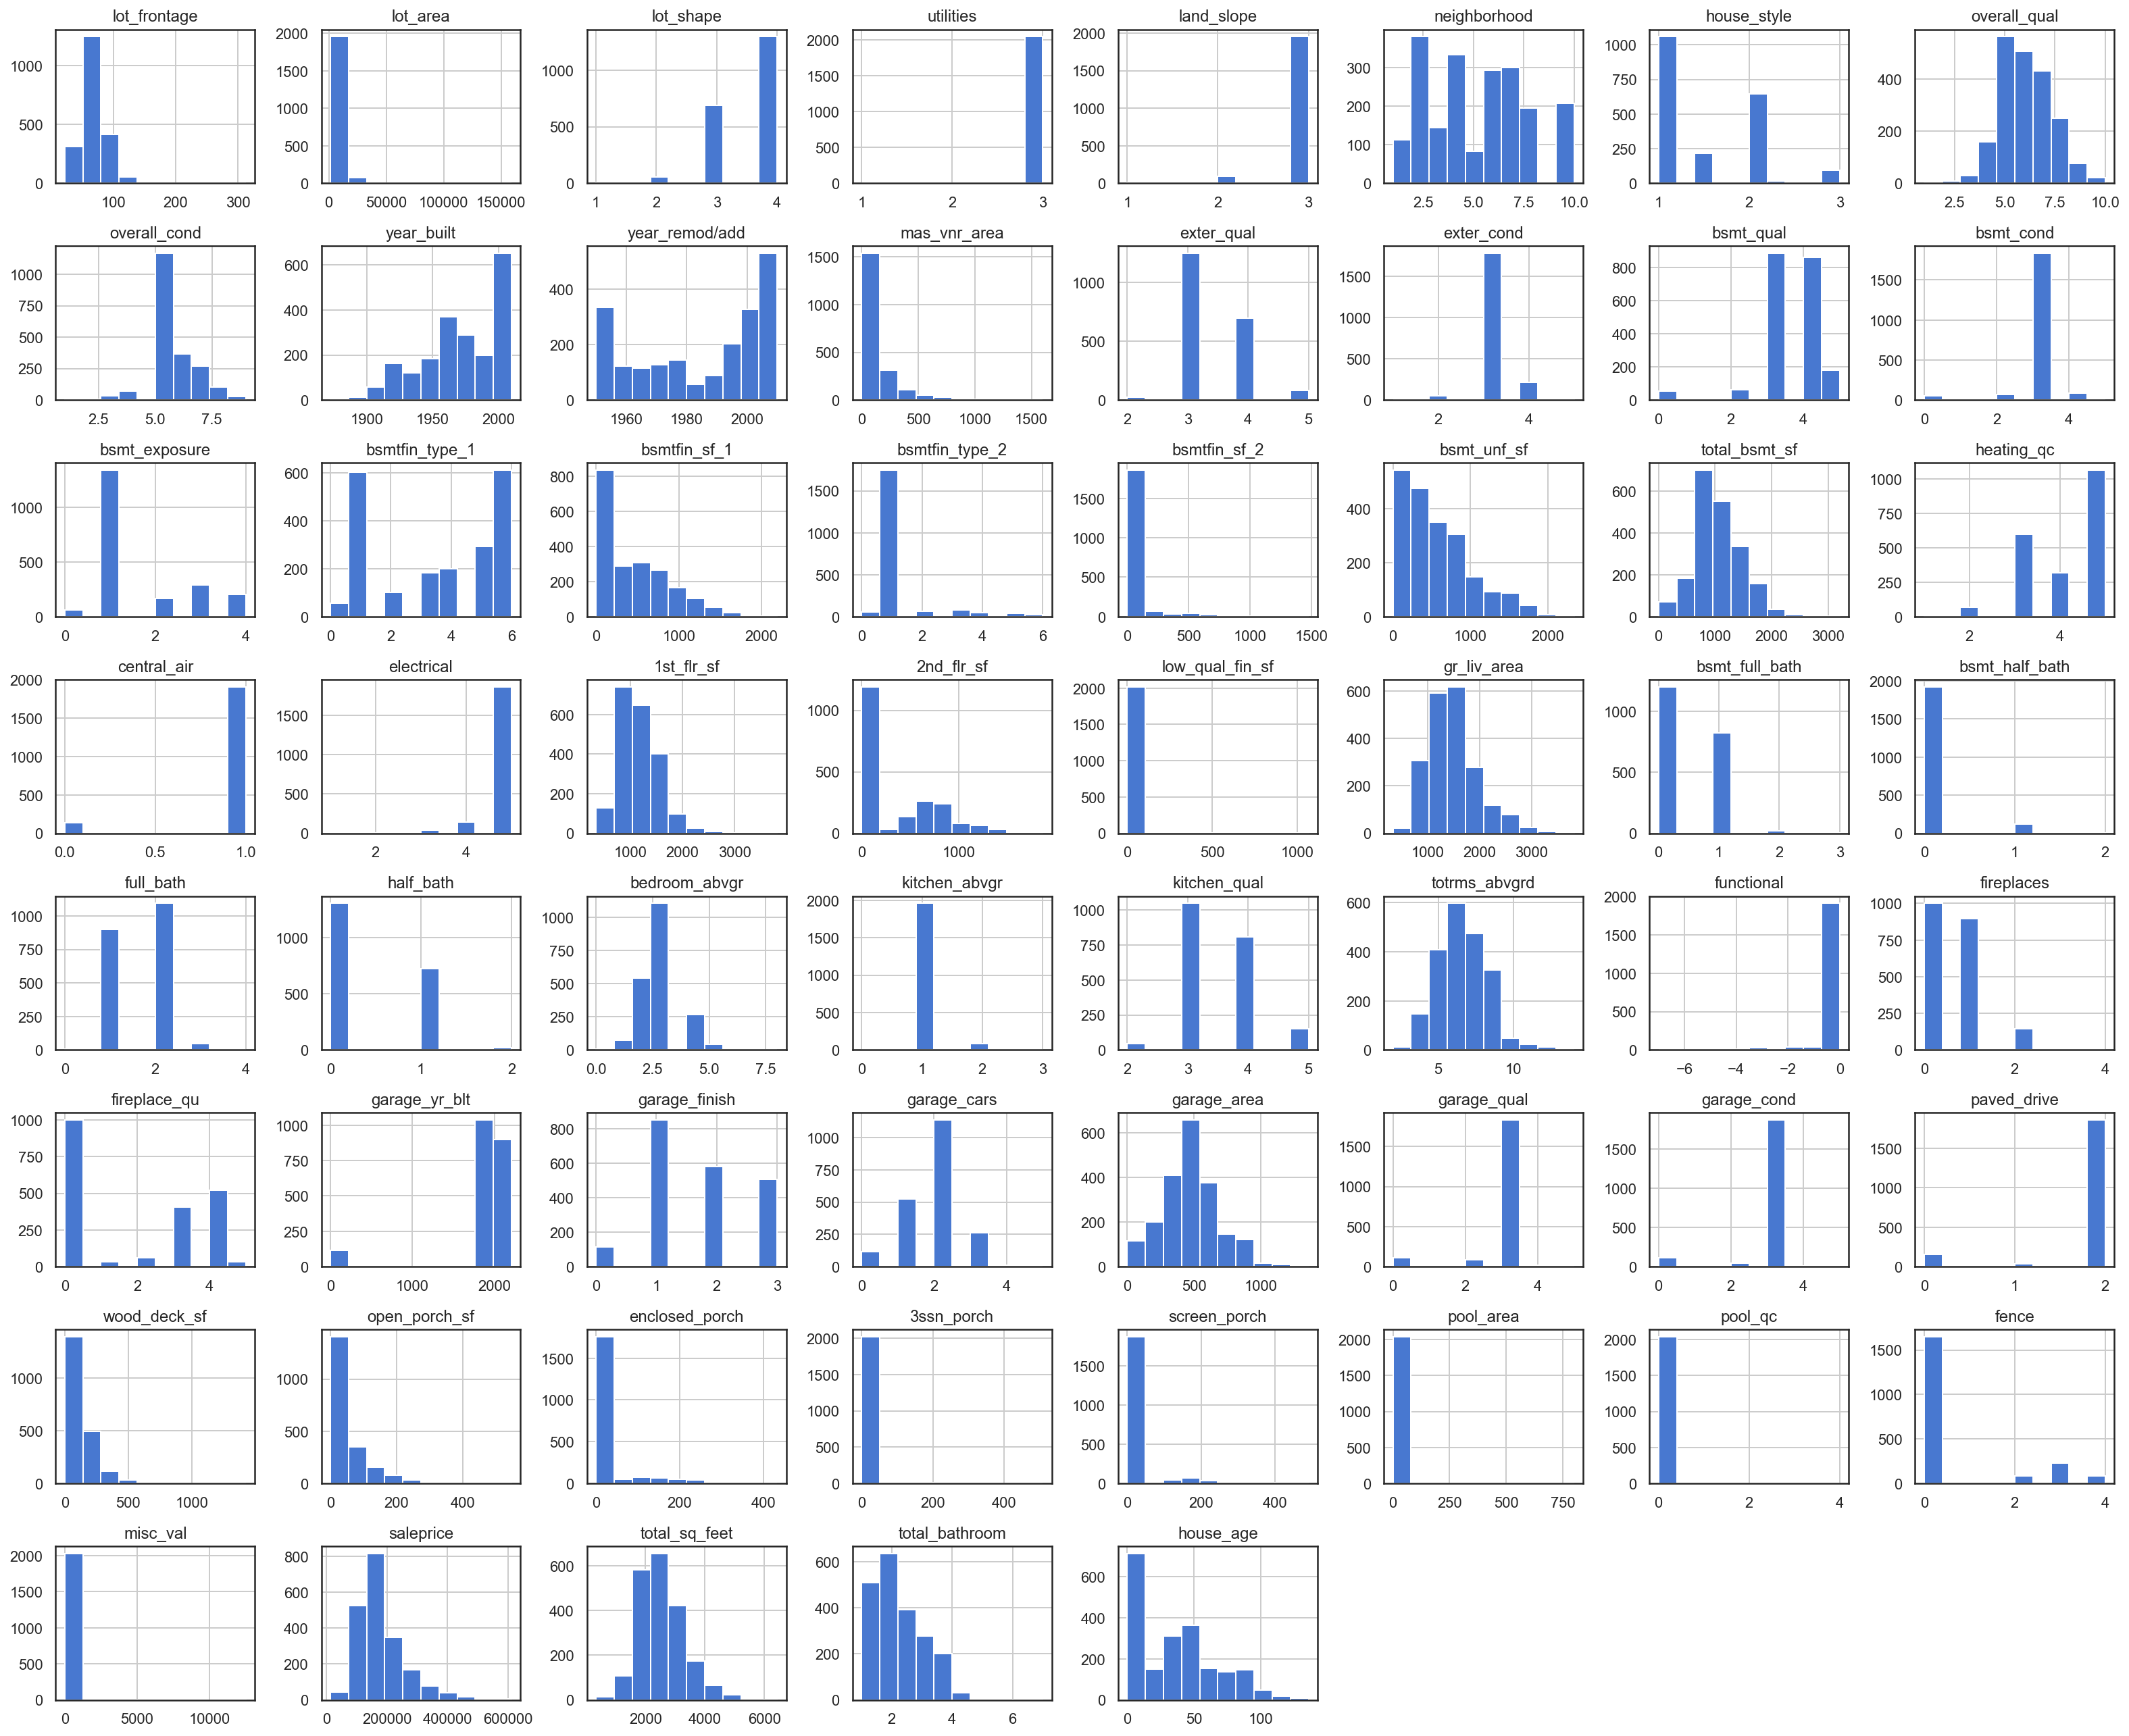

In [72]:
#histogram
# to show the distribution of numerical variables
plt.figure(facecolor='white')
train.hist(figsize=(22,18))
plt.tight_layout()
plt.show()

In [73]:
#We have identified from above the distributions of each variable
#We will drop the variables that have little to no variance as it won't be a useful indicator of the house price
cols_to_drop = ['lot_area', 'utilities', 'land_slope', 'bsmtfin_type_2', 'bsmtfin_sf_2',
                'central_air', 'electrical', 'low_qual_fin_sf', 'bsmt_half_bath',
                'kitchen_abvgr', 'functional', 'garage_qual', 'garage_cond', 'paved_drive', 
                'enclosed_porch', '3ssn_porch', 'screen_porch', 'pool_area', 'pool_qc',
                'fence', 'misc_val']

In [74]:
train.shape, test.shape

((2049, 82), (878, 81))

In [75]:
train.drop(columns = cols_to_drop, inplace = True)
test.drop(columns = cols_to_drop, inplace = True)

In [76]:
#check remaining columns:
train.shape, test.shape

((2049, 61), (878, 60))

Text(0.5, 1.0, 'Correlation Heatmap')

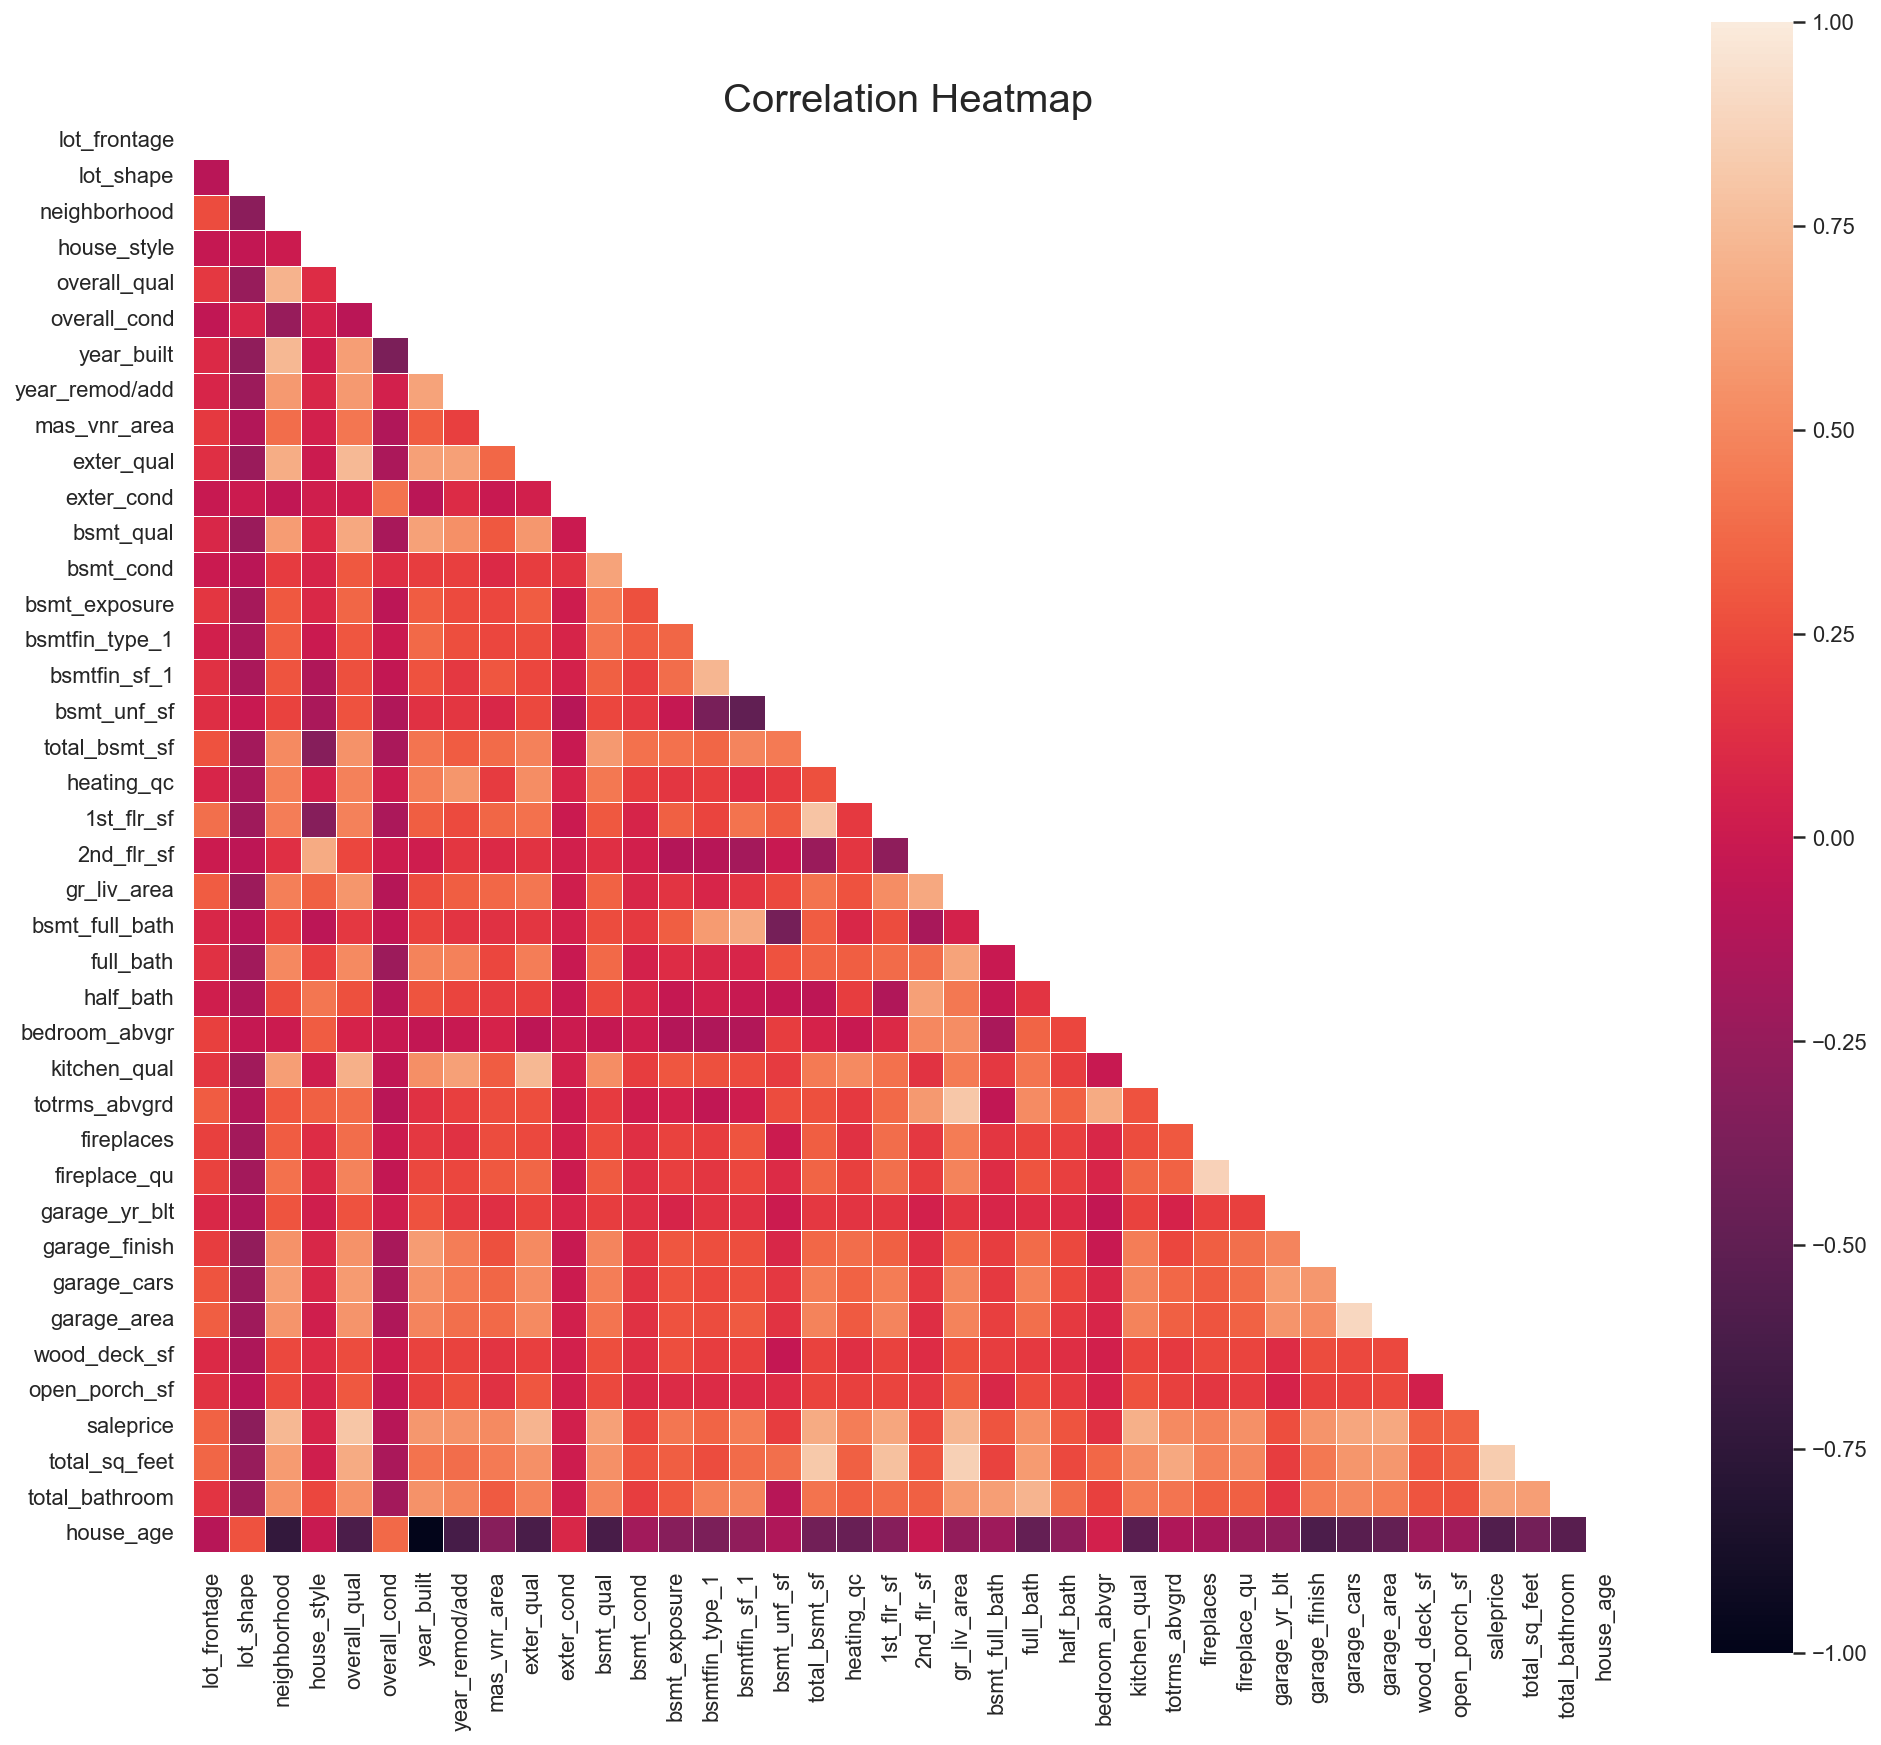

In [77]:
#Correlation heatmap
# Establish size of figure.
plt.figure(figsize = (16,15))

# Get correlation of variables.
corr = train.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, vmin = -1, vmax = 1, linewidths = .5)
    
#Name the title:
plt.title('Correlation Heatmap', fontsize = 20)

Text(0.5, 1.0, 'Ames Housing Heatmap')

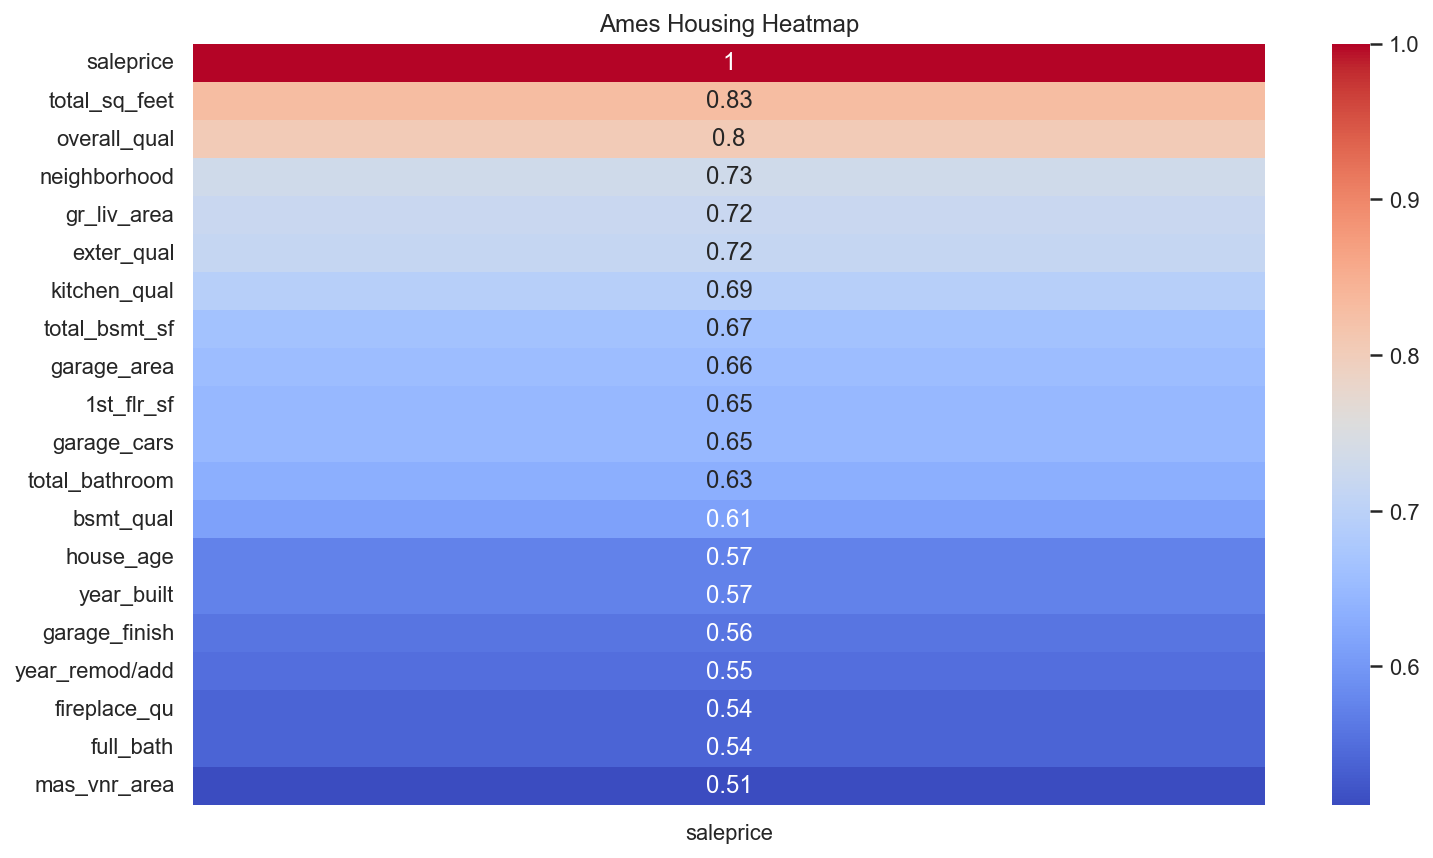

In [78]:
#plot heatmap to visualize the correlation between variables
plt.figure(figsize=(12,7))
sorted_corr = np.abs(train.corr()[['saleprice']]).sort_values('saleprice', ascending=False)
ax = sns.heatmap(sorted_corr.head(20), cmap='coolwarm', annot = True)
ax.set_title('Ames Housing Heatmap')

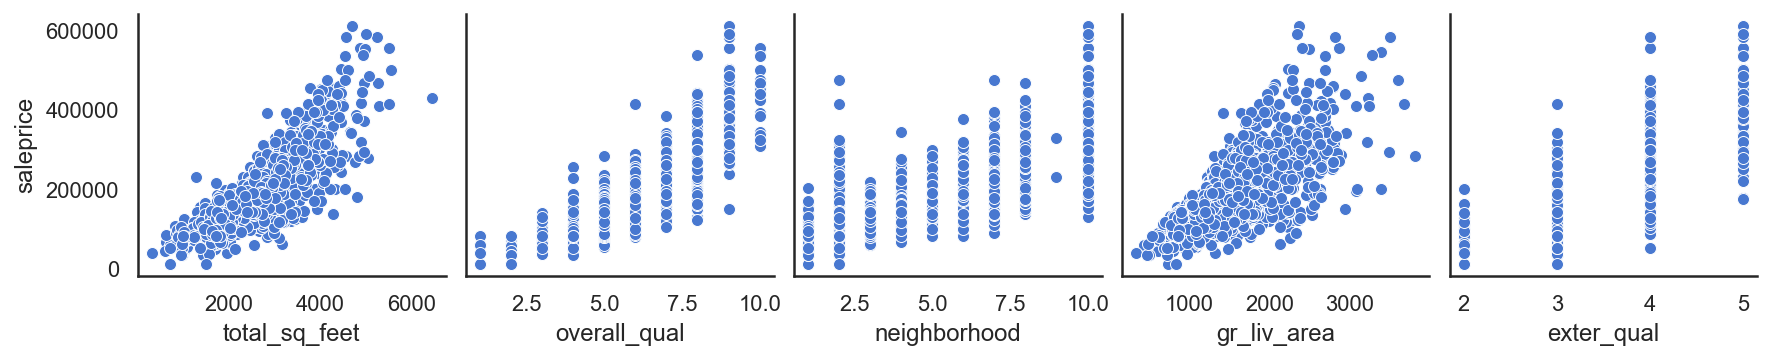

In [79]:
#pairplot
#top 5 highly correlated features:
sns.pairplot(train, y_vars = 'saleprice', x_vars = train[sorted_corr[1:6].index])

In [80]:
#Correlation coefficicent closer to 1 will imply a stronger positive correlation to 'saleprice'
#we choose the numerical variables with correlation coefficient of at least 0.5 to 'saleprice'
chosen_numcol = sorted_corr[sorted_corr['saleprice']>=0.5].index
chosen_numcol

Index(['saleprice', 'total_sq_feet', 'overall_qual', 'neighborhood',
       'gr_liv_area', 'exter_qual', 'kitchen_qual', 'total_bsmt_sf',
       'garage_area', '1st_flr_sf', 'garage_cars', 'total_bathroom',
       'bsmt_qual', 'house_age', 'year_built', 'garage_finish',
       'year_remod/add', 'fireplace_qu', 'full_bath', 'mas_vnr_area',
       'totrms_abvgrd'],
      dtype='object')

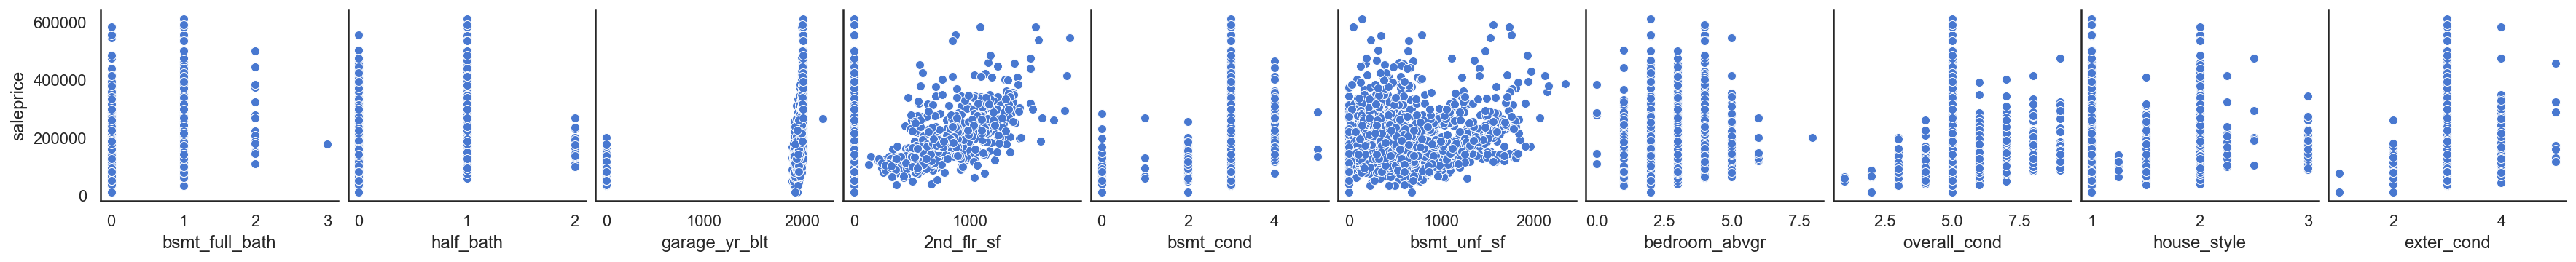

In [81]:
#pairplot
#5 highly uncorrelated features:
sns.pairplot(train, y_vars = 'saleprice', x_vars = train[sorted_corr.tail(10).index])

In [82]:
train.shape, test.shape

((2049, 61), (878, 60))

In [83]:
#we will drop columns that are not highly correlated with 'saleprice'
#we set the threshold to be those with correlation coefficient <0.5:
numcol_drop = sorted_corr[sorted_corr['saleprice']<0.5].index
train.drop(columns = numcol_drop, inplace = True)
test.drop(columns = numcol_drop, inplace = True)

In [84]:
train.shape, test.shape

((2049, 42), (878, 41))

In [85]:
len(sorted_corr), len(chosen_numcol), len(numcol_drop)

(40, 21, 19)

#### Feature Selection - Categorical Features

In [86]:
# boxplot subplots
def subplot_box(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/4)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=4,figsize=(15, nrows*3.5)) 
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        sns.boxplot(x = dataframe[column], y = dataframe.saleprice, width = 0.3, ax = ax[i], color='pink')
        ax[i].set_title(column,fontsize=14)  
        ax[i].tick_params(labelsize=12)
        ax[i].set_xlabel(column, fontsize=14)
        ax[i].set_ylabel('saleprice', fontsize=14)
    plt.tight_layout()

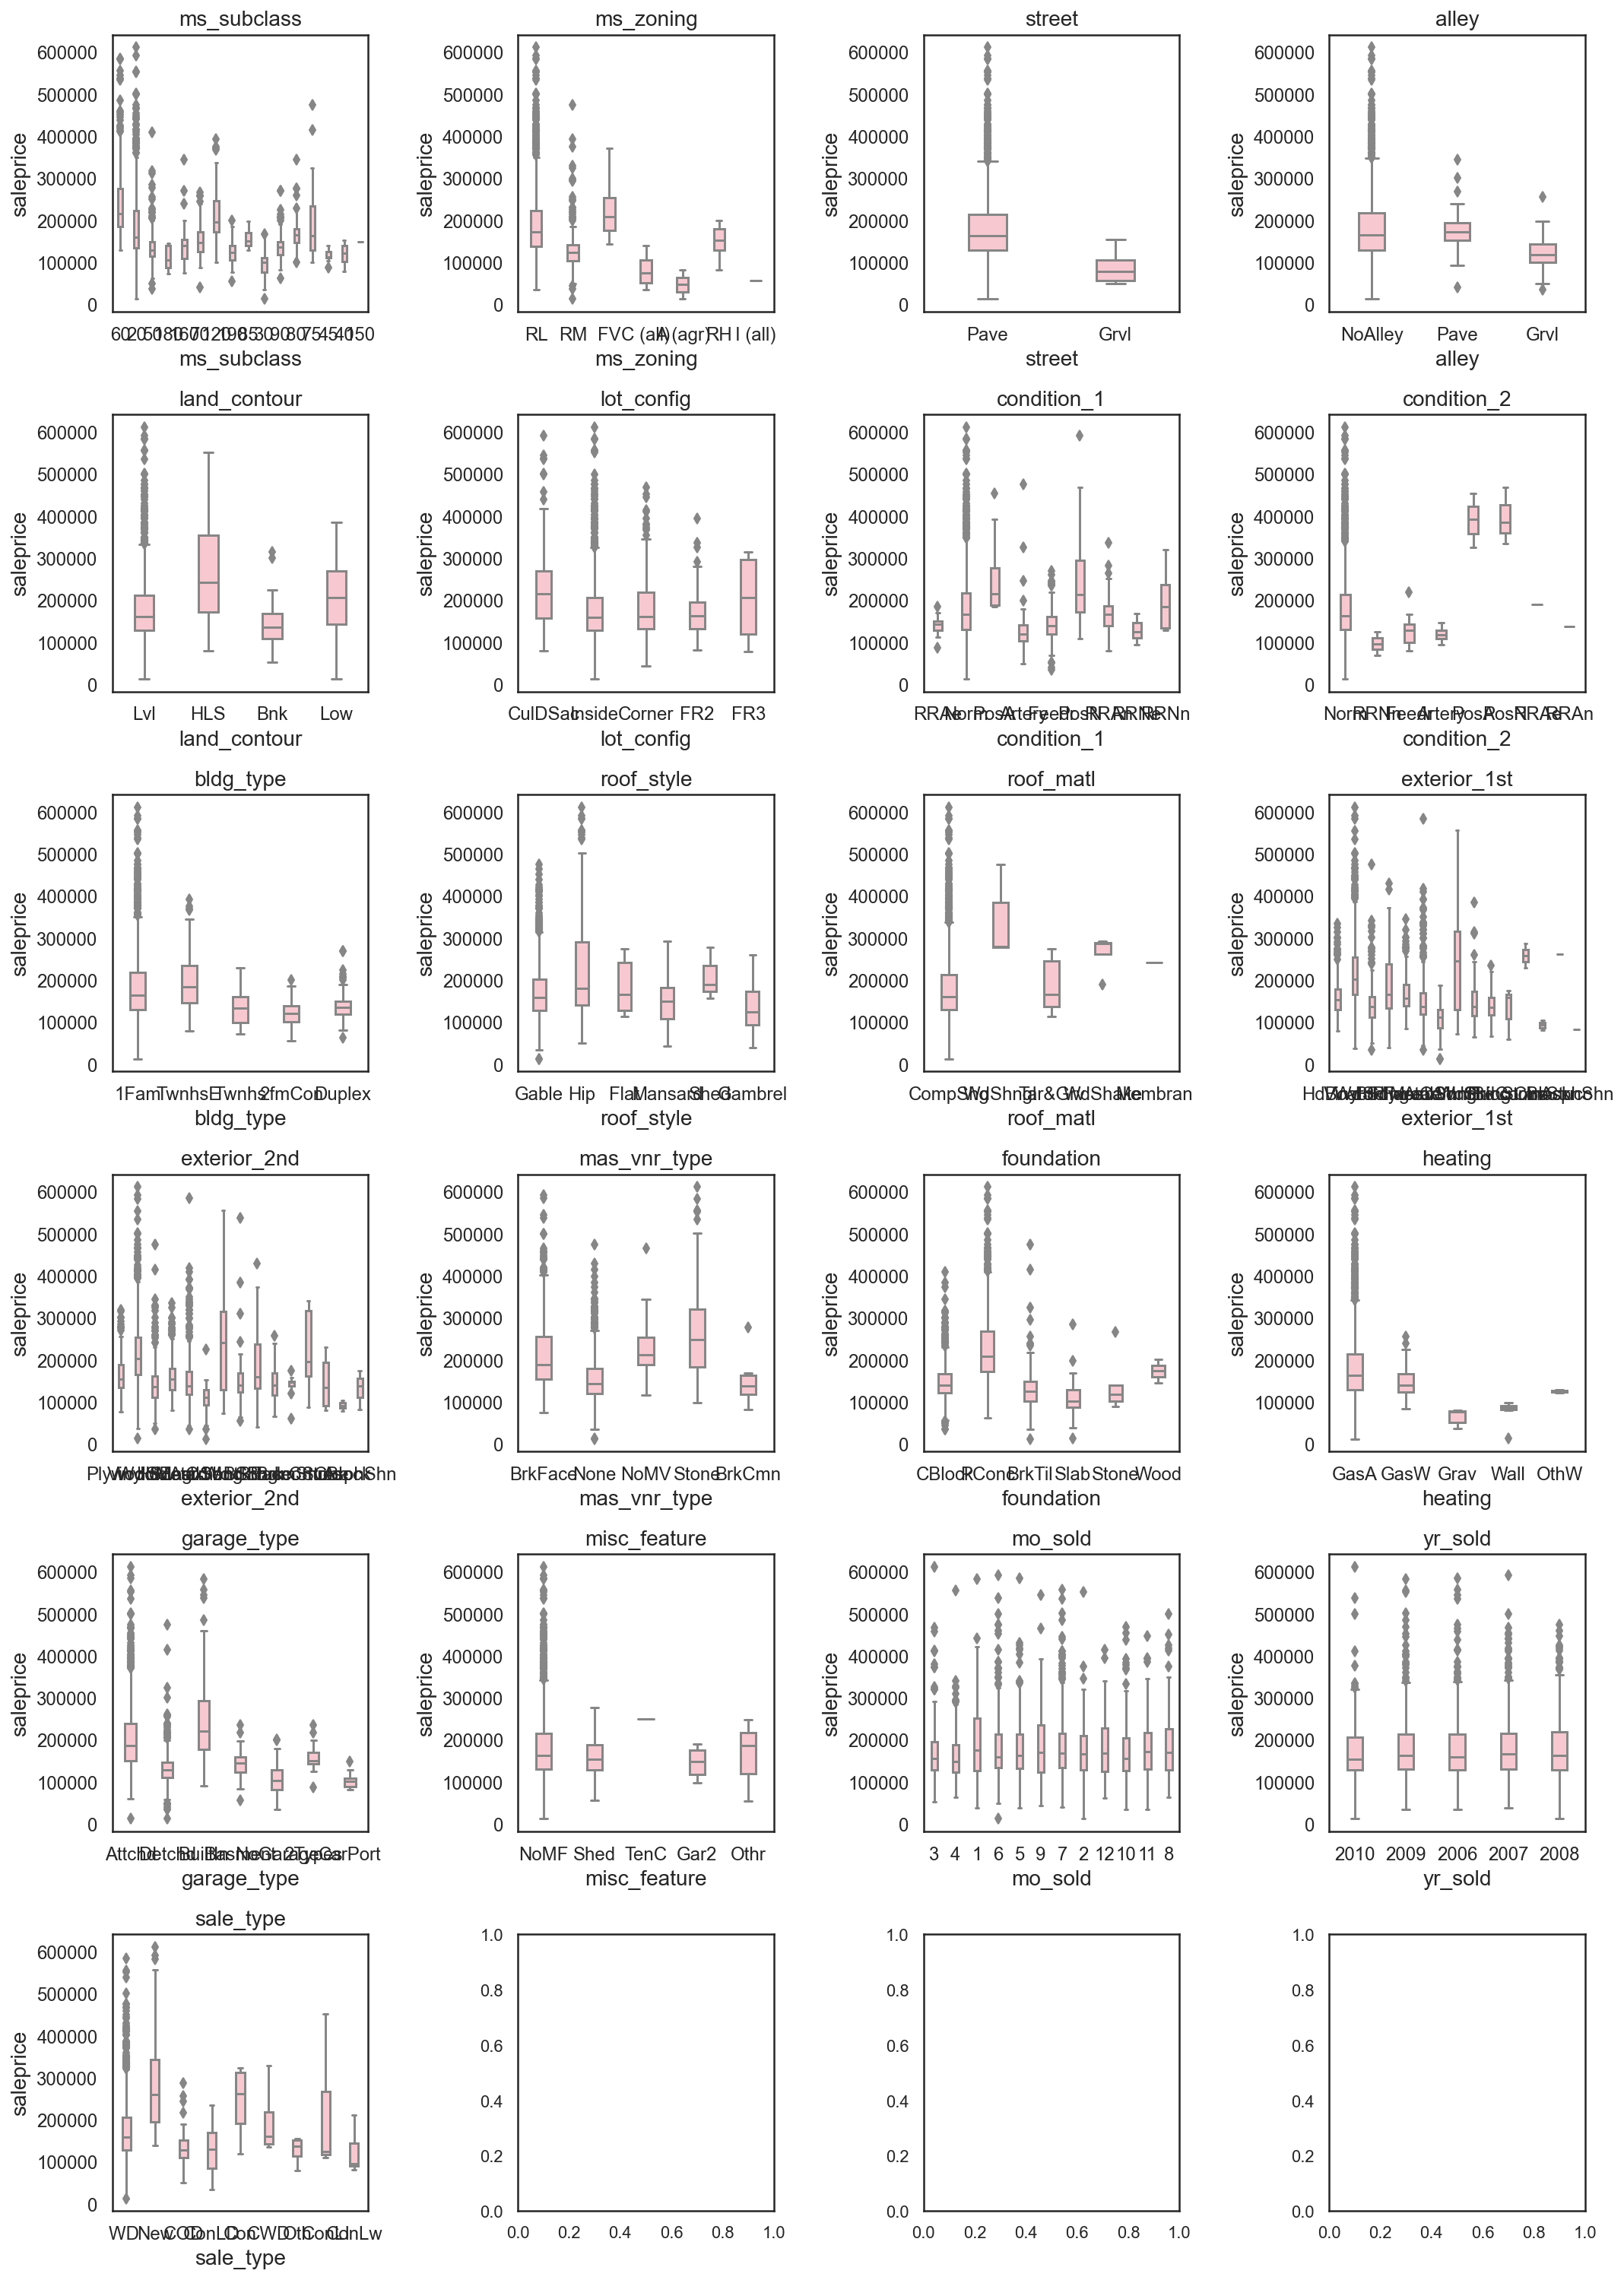

In [87]:
col_categorical = [col for col in train.columns if train[col].dtype == object]
subplot_box(train, col_categorical)

In [88]:
train.shape, test.shape

((2049, 42), (878, 41))

In [89]:
#dropping features that do not seem to have relationship with sale price based on boxplot:
catcol_drop = ['ms_subclass', 'exterior_1st', 'exterior_2nd', 'mo_sold', 'yr_sold', 'misc_feature']
train.drop(columns = catcol_drop, inplace=True)
test.drop(columns = catcol_drop, inplace=True)

In [90]:
train.shape, test.shape

((2049, 36), (878, 35))

## 3. Preprocessing and Modeling
---

### Pre-processing

#### Model Prep: Create features matrix (X) and target vector (y)

In [91]:
#we start by training the most complex model
#include all features from data set and create dummies for categorical variables

In [92]:
train.head()

ms_zoning street    alley land_contour lot_config  neighborhood  \
id                                                                    
109        RL   Pave  NoAlley          Lvl    CulDSac             3   
544        RL   Pave  NoAlley          Lvl    CulDSac             6   
153        RL   Pave  NoAlley          Lvl     Inside             4   
318        RL   Pave  NoAlley          Lvl     Inside             8   
255        RL   Pave  NoAlley          Lvl     Inside             6   

    condition_1 condition_2 bldg_type  overall_qual  year_built  \
id                                                                
109        RRAe        Norm      1Fam             6        1976   
544        Norm        Norm      1Fam             7        1996   
153        Norm        Norm      1Fam             5        1953   
318        Norm        Norm      1Fam             5        2006   
255        Norm        Norm      1Fam             6        1900   

     year_remod/add roof_style roof_matl mas_vnr_type  mas_vnr_area  \
id                                                                    
109            2005      Gable   CompShg      BrkFace         289.0   
544            1997      Gable   CompShg      BrkFace         132.0   
153            2007      Gable   CompShg         None           0.0   
318            2007      Gable   CompShg         None           0.0   
255            1993      Gable   CompShg         None           0.0   

     exter_qual foundation  bsmt_qual  total_bsmt_sf heating  1st_flr_sf  \
id                                                                         
109           4     CBlock          3          725.0    GasA         725   
544           4      PConc          4          913.0    GasA         913   
153           3     CBlock          3         1057.0    GasA        1057   
318           3      PConc          4          384.0    GasA         744   
255           3      PConc          2          676.0    GasA         831   

     gr_liv_area  full_bath  kitchen_qual  totrms_abvgrd  fireplace_qu  \
id                                                                       
109         1479          2             4              6             0   
544         2122          2             4              8             3   
153         1057          1             4              5             0   
318         1444          2             3              7             0   
255         1445          2             3              6             0   

    garage_type  garage_finish  garage_cars  garage_area sale_type  saleprice  \
id                                                                              
109      Attchd              2          2.0        475.0       WD      130500   
544      Attchd              2          2.0        559.0       WD      220000   
153      Detchd              1          1.0        246.0       WD      109000   
318     BuiltIn              3          2.0        400.0       WD      174000   
255      Detchd              1          2.0        484.0       WD      138500   

     total_sq_feet  total_bathroom  house_age  
id                                             
109         2204.0             2.5         34  
544         3035.0             3.5         13  
153         2114.0             2.0         57  
318         1828.0             2.5          4  
255         2121.0             2.0        110

In [93]:
train.shape, test.shape

((2049, 36), (878, 35))

In [94]:
#Set train data for modeling
#X = train.drop(columns = ['saleprice'])
X = train.drop(columns = ['saleprice'])
y = train[['saleprice']].values.ravel()

In [95]:
X.head()

ms_zoning street    alley land_contour lot_config  neighborhood  \
id                                                                    
109        RL   Pave  NoAlley          Lvl    CulDSac             3   
544        RL   Pave  NoAlley          Lvl    CulDSac             6   
153        RL   Pave  NoAlley          Lvl     Inside             4   
318        RL   Pave  NoAlley          Lvl     Inside             8   
255        RL   Pave  NoAlley          Lvl     Inside             6   

    condition_1 condition_2 bldg_type  overall_qual  year_built  \
id                                                                
109        RRAe        Norm      1Fam             6        1976   
544        Norm        Norm      1Fam             7        1996   
153        Norm        Norm      1Fam             5        1953   
318        Norm        Norm      1Fam             5        2006   
255        Norm        Norm      1Fam             6        1900   

     year_remod/add roof_style roof_matl mas_vnr_type  mas_vnr_area  \
id                                                                    
109            2005      Gable   CompShg      BrkFace         289.0   
544            1997      Gable   CompShg      BrkFace         132.0   
153            2007      Gable   CompShg         None           0.0   
318            2007      Gable   CompShg         None           0.0   
255            1993      Gable   CompShg         None           0.0   

     exter_qual foundation  bsmt_qual  total_bsmt_sf heating  1st_flr_sf  \
id                                                                         
109           4     CBlock          3          725.0    GasA         725   
544           4      PConc          4          913.0    GasA         913   
153           3     CBlock          3         1057.0    GasA        1057   
318           3      PConc          4          384.0    GasA         744   
255           3      PConc          2          676.0    GasA         831   

     gr_liv_area  full_bath  kitchen_qual  totrms_abvgrd  fireplace_qu  \
id                                                                       
109         1479          2             4              6             0   
544         2122          2             4              8             3   
153         1057          1             4              5             0   
318         1444          2             3              7             0   
255         1445          2             3              6             0   

    garage_type  garage_finish  garage_cars  garage_area sale_type  \
id                                                                   
109      Attchd              2          2.0        475.0       WD    
544      Attchd              2          2.0        559.0       WD    
153      Detchd              1          1.0        246.0       WD    
318     BuiltIn              3          2.0        400.0       WD    
255      Detchd              1          2.0        484.0       WD    

     total_sq_feet  total_bathroom  house_age  
id                                             
109         2204.0             2.5         34  
544         3035.0             3.5         13  
153         2114.0             2.0         57  
318         1828.0             2.5          4  
255         2121.0             2.0        110

In [96]:
#Set test data to be used for kaggle prediction:
X_kaggle = test.copy()

#### One hot encode categorical variables

In [97]:
X.shape, X_kaggle.shape

((2049, 35), (878, 35))

In [98]:
#checking that the train and test datasets have equal number of features:
X.columns == X_kaggle.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [99]:
#Create dummies for categorical variables
X = pd.get_dummies(X, drop_first=True)
X_kaggle = pd.get_dummies(X_kaggle, drop_first=True)

In [100]:
#difference in the number of columns in train and test sets:
print(f'Missing columns in kaggle test set: {X.shape[1] - X_kaggle.shape[1]}')

Missing columns in kaggle test set: 4


In [101]:
#intersection of the train and test sets:
#these are the columns that we are going to keep:
cols_intersect = set(X.columns).intersection(set(X_kaggle.columns))

In [102]:
X = X[list(cols_intersect)]
X_kaggle = X_kaggle[list(cols_intersect)]

In [103]:
#Check that train and kaggle test have the same number of features:
X.shape[1] == X_kaggle.shape[1]

True

In [104]:
#Check number of columns after getting dummies:
X.shape, X_kaggle.shape

((2049, 82), (878, 82))

#### Remove variables with low correlation to saleprice

In [105]:
# See the correlations in descending order

corr = X.corr() # df is the pandas dataframe
corr1 = corr.abs().unstack()
corr1 = corr1[corr1!=1]
corr1.sort_values(ascending = False).head(30)

house_age             year_built              0.999055
year_built            house_age               0.999055
roof_style_Hip        roof_style_Gable        0.948244
roof_style_Gable      roof_style_Hip          0.948244
garage_area           garage_cars             0.897310
garage_cars           garage_area             0.897310
gr_liv_area           total_sq_feet           0.855667
total_sq_feet         gr_liv_area             0.855667
                      total_bsmt_sf           0.819105
total_bsmt_sf         total_sq_feet           0.819105
gr_liv_area           totrms_abvgrd           0.812129
totrms_abvgrd         gr_liv_area             0.812129
mas_vnr_type_None     mas_vnr_type_BrkFace    0.806682
mas_vnr_type_BrkFace  mas_vnr_type_None       0.806682
ms_zoning_RL          ms_zoning_RM            0.801515
ms_zoning_RM          ms_zoning_RL            0.801515
1st_flr_sf            total_bsmt_sf           0.790246
total_bsmt_sf         1st_flr_sf              0.790246
1st_flr_sf

In [106]:
collinear_col = ['year_built','roof_style_Hip', 'garage_cars', 'gr_liv_area',
                'total_bsmt_sf', 'mas_vnr_type_BrkFace', 'ms_zoning_RL',
                '1st_flr_sf', 'foundation_PConc', 'sale_type_New',
                'exter_qual']

In [107]:
X.drop(columns = collinear_col, inplace=True)
X_kaggle.drop(columns = collinear_col, inplace=True)

#### Model Prep : Train / test split

In [108]:
X_train, X_val, y_train, y_val = train_test_split(X, 
                                                    y, 
                                                    random_state= 42, 
                                                     test_size = 0.2)

In [109]:
#Check train/test shape
print(f'X_train shape is: {X_train.shape}')
print(f'y_train shape is: {y_train.shape}')
print(f'X_val shape is: { X_val.shape}')
print(f'y_val shape is: {y_val.shape}')

X_train shape is: (1639, 71)
y_train shape is: (1639,)
X_val shape is: (410, 71)
y_val shape is: (410,)


#### Model Prep : Scaling

In [110]:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_val_sc = ss.transform(X_val)
X_kaggle_sc = ss.transform(X_kaggle)

#### Features selected

In [111]:
len(X_train.columns)

71

In [112]:
#Features selected for regression:
list(X_train.columns)

['garage_type_Attchd',
 'garage_type_Basment',
 'street_Pave',
 'heating_Grav',
 'roof_style_Gambrel',
 'bldg_type_Duplex',
 'roof_style_Shed',
 'overall_qual',
 'neighborhood',
 'roof_style_Mansard',
 'sale_type_ConLD',
 'sale_type_ConLw',
 'roof_matl_Tar&Grv',
 'condition_2_PosA',
 'bldg_type_2fmCon',
 'mas_vnr_area',
 'mas_vnr_type_None',
 'total_bathroom',
 'year_remod/add',
 'garage_area',
 'foundation_Wood',
 'condition_1_RRNn',
 'mas_vnr_type_Stone',
 'lot_config_Inside',
 'foundation_Slab',
 'condition_1_RRNe',
 'bsmt_qual',
 'heating_GasW',
 'lot_config_FR2',
 'condition_2_Norm',
 'condition_1_Feedr',
 'garage_type_Detchd',
 'sale_type_CWD',
 'roof_matl_WdShngl',
 'full_bath',
 'condition_1_RRAe',
 'totrms_abvgrd',
 'roof_matl_WdShake',
 'sale_type_ConLI',
 'fireplace_qu',
 'land_contour_HLS',
 'roof_style_Gable',
 'land_contour_Low',
 'condition_1_Norm',
 'bldg_type_TwnhsE',
 'garage_type_NoGarage',
 'alley_NoAlley',
 'sale_type_Oth',
 'house_age',
 'ms_zoning_FV',
 'mas_vnr_

### Modeling

#### Establishing the baseline score

In [113]:
y_hat = [np.median(y_train) for i in y_val]
r2_test = r2_score(y_true=y_val, y_pred=y_hat)
rmse_test = np.sqrt(mean_squared_error(y_true=y_val, y_pred=y_hat))
print(f'R2 : {r2_test}')
print(f'RMSE: {rmse_test}')

R2 : -0.04280830560960469
RMSE: 78869.14057084004


#### Model Prep : Instantiate our models

In [114]:
#linear regression
lr = LinearRegression()
cv_score = -cross_val_score(lr, X_train_sc, y_train, cv=5,
                          scoring ='neg_root_mean_squared_error').mean()

#prediction
lr.fit(X_train_sc, y_train)
y_hat = lr.predict(X_val_sc)

#RMSE:
rmse_test = np.sqrt(mean_squared_error(y_true=y_val, y_pred=y_hat))

#R2 score:
r2_test = r2_score(y_true=y_val, y_pred=y_hat)

print('Linear Regression')
print(f'CV RMSE: {cv_score}')
print(f'Test RMSE: {rmse_test}')
print(f'Test R2: {r2_test}')

Linear Regression
CV RMSE: 28545.733949302474
Test RMSE: 27173.759114610675
Test R2: 0.8762088187303567


In [115]:
# How does the model score on the training and validation data?
print(lr.score(X_train_sc, y_train))
print(lr.score(X_val_sc, y_val))

0.8911686613460648
0.8762088187303567


In [116]:
print(lr.score(X_val_sc, lr.predict(X_val_sc))) 
#you will get 1 because you are comparing predictions with predictions

1.0


In [117]:
#overfitted

In [118]:
r2_score(y_true=y_val, y_pred=y_hat)

0.8762088187303567

In [119]:
y_train_pred = lr.predict(X_train_sc)
y_test_pred = lr.predict(X_val_sc)

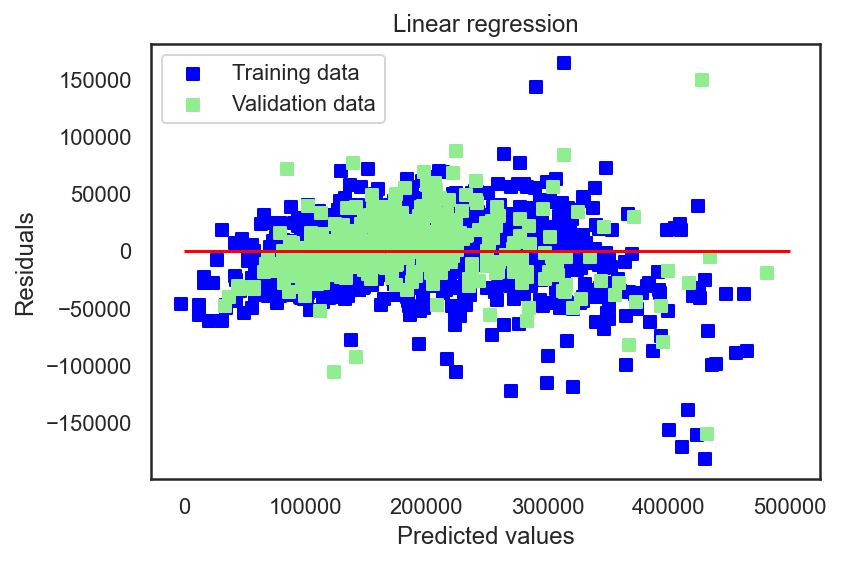

In [120]:
# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_val, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 0, xmax = 500000, color = "red")
plt.show()

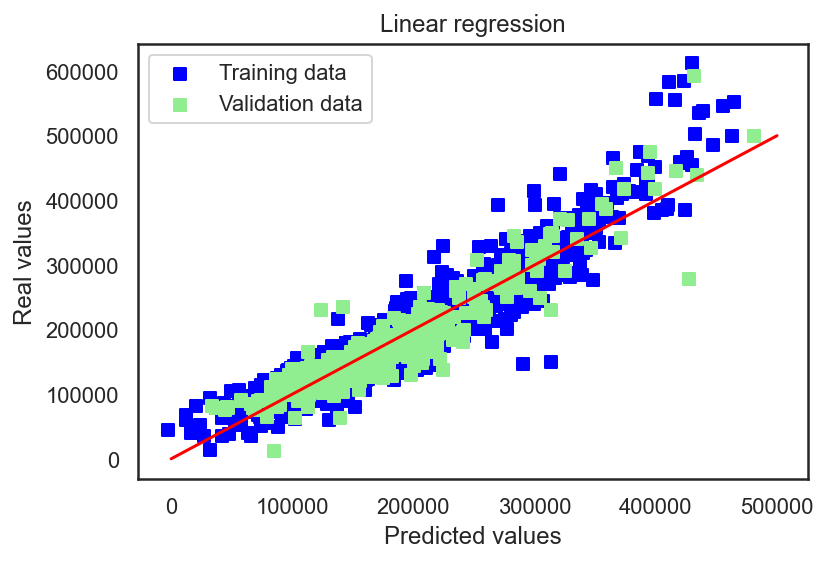

In [121]:
# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_val, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([0, 500000], [0, 500000], c = "red")
plt.show()

#### Regularization: Ridge Model

In [122]:
# Ridge regression:
ridge_cv = RidgeCV(alphas=[0.1,1,10,100])
ridge_cv.fit(X_train_sc, y_train)
ridge = Ridge(alpha= ridge_cv.alpha_, max_iter=1000)
ridge_scores = -cross_val_score(ridge, X_train_sc, y_train, cv=5, 
                                scoring ='neg_root_mean_squared_error').mean()
ridge.fit(X_train_sc, y_train)
y_hat = ridge.predict(X_val_sc)
rmse_test = np.sqrt(mean_squared_error(y_true=y_val, y_pred=y_hat))

#R2 score:
r2_test = r2_score(y_true=y_val, y_pred=y_hat)

print('Ridge Regression')
print(f'CV RMSE: {ridge_scores}')
print(f'Test RMSE: {rmse_test}')
print(f'Test R2: {r2_test}')

Ridge Regression
CV RMSE: 28510.899463892703
Test RMSE: 27119.370706491904
Test R2: 0.8767038600964868


#### Regularization: Lasso Model

In [123]:
#Lasso regression:
lasso_cv = LassoCV(alphas=[0.1,1,10,100])
lasso_cv.fit(X_train_sc, y_train)
lasso = Lasso(alpha= ridge_cv.alpha_, max_iter=5000)
lasso_scores = -cross_val_score(lasso, X_train_sc, y_train, cv=5, scoring='neg_root_mean_squared_error').mean()
print('Lasso Regression')
print(f'CV RMSE: {lasso_scores}')

#R2 score:
r2_test = r2_score(y_true=y_val, y_pred=y_hat)

lasso.fit(X_train_sc, y_train)
y_hat = lasso.predict(X_val_sc)
rmse_test = np.sqrt(mean_squared_error(y_true=y_val, y_pred=y_hat))
print(f'RMSE : {rmse_test}')
print(f'Test R2: {r2_test}')

Lasso Regression
CV RMSE: 28529.316868349077
RMSE : 27140.142281238335
Test R2: 0.8767038600964868


In [124]:
lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

#lasso_coefs.head(20)
lasso_coefs

variable          coef      abs_coef
53         total_sq_feet  28649.335776  28649.335776
7           overall_qual  13956.972101  13956.972101
17        total_bathroom  10927.353209  10927.353209
8           neighborhood  10593.374372  10593.374372
58          kitchen_qual   9551.169017   9551.169017
31    garage_type_Detchd   9326.621647   9326.621647
15          mas_vnr_area   9178.070114   9178.070114
0     garage_type_Attchd   8080.908607   8080.908607
45  garage_type_NoGarage   7861.300433   7861.300433
19           garage_area   7824.081586   7824.081586
34             full_bath  -7284.313872   7284.313872
54   garage_type_BuiltIn   6814.868148   6814.868148
16     mas_vnr_type_None   6375.437467   6375.437467
24       foundation_Slab   4744.088045   4744.088045
33     roof_matl_WdShngl   4355.347491   4355.347491
44      bldg_type_TwnhsE  -4207.597656   4207.597656
22    mas_vnr_type_Stone   4121.007800   4121.007800
40      land_contour_HLS   4015.653165   4015.653165
5       bldg_type_Duplex  -3971.033151   3971.033151
43      condition_1_Norm   3677.561920   3677.561920
39          fireplace_qu   3617.752337   3617.752337
63         sale_type_WD   -3140.275548   3140.275548
41      roof_style_Gable  -3099.336192   3099.336192
9     roof_style_Mansard  -2930.942161   2930.942161
18        year_remod/add   2876.380197   2876.380197
1    garage_type_Basment   2827.682706   2827.682706
51       bldg_type_Twnhs  -2635.741431   2635.741431
66    lot_config_CulDSac   2503.071655   2503.071655
56      condition_1_PosN   2080.026648   2080.026648
60         garage_finish   1973.805156   1973.805156
36         totrms_abvgrd   1966.472089   1966.472089
13      condition_2_PosA   1906.112056   1906.112056
26             bsmt_qual   1775.910043   1775.910043
59          ms_zoning_RM   1583.766824   1583.766824
50     mas_vnr_type_NoMV   1518.341811   1518.341811
46         alley_NoAlley   1514.298413   1514.298413
68      condition_1_PosA   1376.306580   1376.306580
61            alley_Pave  -1218.972836   1218.972836
3           heating_Grav  -1165.288340   1165.288340
6        roof_style_Shed  -1112.849368   1112.849368
21      condition_1_RRNn  -1099.377739   1099.377739
57     ms_zoning_I (all)   1066.940701   1066.940701
30     condition_1_Feedr   1051.273720   1051.273720
14      bldg_type_2fmCon  -1006.362411   1006.362411
67   garage_type_CarPort    914.144642    914.144642
62         sale_type_Con    840.861297    840.861297
47         sale_type_Oth    834.160573    834.160573
29      condition_2_Norm   -812.420978    812.420978
4     roof_style_Gambrel   -796.303538    796.303538
52      land_contour_Lvl   -733.492064    733.492064
48             house_age   -602.624744    602.624744
2            street_Pave    590.302064    590.302064
23     lot_config_Inside    563.234267    563.234267
35      condition_1_RRAe   -526.432084    526.432084
27          heating_GasW   -509.162049    509.162049
70      condition_1_RRAn    424.204293    424.204293
25      condition_1_RRNe    415.162898    415.162898
20       foundation_Wood    412.202246    412.202246
11       sale_type_ConLw   -317.340647    317.340647
37     roof_matl_WdShake    308.292248    308.292248
65      foundation_Stone    278.674668    278.674668
38       sale_type_ConLI    163.766398    163.766398
64          ms_zoning_RH    141.377831    141.377831
69        lot_config_FR3   -100.467739    100.467739
12     roof_matl_Tar&Grv     98.041922     98.041922
55     foundation_CBlock     93.090177     93.090177
49          ms_zoning_FV     88.483297     88.483297
32         sale_type_CWD     66.066146     66.066146
10       sale_type_ConLD    -14.664104     14.664104
28        lot_config_FR2      0.000000      0.000000
42      land_contour_Low      0.000000      0.000000

In [125]:
print ('Percent variables zeroed out:', np.sum((lasso.coef_ == 0))/float(X.shape[0]))

Percent variables zeroed out: 0.0009760858955588092


#### Elastic Net Regression

In [126]:
#Instantiating and fitting the elastic net to find the optimised alpha and l1_ratio
enet_cv = ElasticNetCV(n_alphas=100,l1_ratio=np.linspace(0.01,1,50),cv=10)
enet_cv.fit(X_train_sc, y_train)

ElasticNetCV(cv=10,
             l1_ratio=array([0.01      , 0.03020408, 0.05040816, 0.07061224, 0.09081633,
       0.11102041, 0.13122449, 0.15142857, 0.17163265, 0.19183673,
       0.21204082, 0.2322449 , 0.25244898, 0.27265306, 0.29285714,
       0.31306122, 0.33326531, 0.35346939, 0.37367347, 0.39387755,
       0.41408163, 0.43428571, 0.4544898 , 0.47469388, 0.49489796,
       0.51510204, 0.53530612, 0.5555102 , 0.57571429, 0.59591837,
       0.61612245, 0.63632653, 0.65653061, 0.67673469, 0.69693878,
       0.71714286, 0.73734694, 0.75755102, 0.7777551 , 0.79795918,
       0.81816327, 0.83836735, 0.85857143, 0.87877551, 0.89897959,
       0.91918367, 0.93938776, 0.95959184, 0.97979592, 1.        ]))

In [127]:
#Optimising alpha
enet_cv.alpha_

329.36570711815665

In [128]:
#Optimising l1 ratio
#l1 = 1 : use lasso model
enet_cv.l1_ratio_

1.0

In [129]:
#Evaluating the R2 scores of elastic net
enet_score_r2 = cross_val_score(enet_cv, X_train_sc, y_train, cv=10)
enet_score_r2.mean()

0.8716583896328192

### Interpreting the data

In [130]:
#According to the highest R2 score and lowest RMSE score, we will choose lasso model

In [131]:
#model.coef_
lasso.coef_

array([ 8.08090861e+03,  2.82768271e+03,  5.90302064e+02, -1.16528834e+03,
       -7.96303538e+02, -3.97103315e+03, -1.11284937e+03,  1.39569721e+04,
        1.05933744e+04, -2.93094216e+03, -1.46641044e+01, -3.17340647e+02,
        9.80419219e+01,  1.90611206e+03, -1.00636241e+03,  9.17807011e+03,
        6.37543747e+03,  1.09273532e+04,  2.87638020e+03,  7.82408159e+03,
        4.12202246e+02, -1.09937774e+03,  4.12100780e+03,  5.63234267e+02,
        4.74408804e+03,  4.15162898e+02,  1.77591004e+03, -5.09162049e+02,
        0.00000000e+00, -8.12420978e+02,  1.05127372e+03,  9.32662165e+03,
        6.60661456e+01,  4.35534749e+03, -7.28431387e+03, -5.26432084e+02,
        1.96647209e+03,  3.08292248e+02,  1.63766398e+02,  3.61775234e+03,
        4.01565316e+03, -3.09933619e+03,  0.00000000e+00,  3.67756192e+03,
       -4.20759766e+03,  7.86130043e+03,  1.51429841e+03,  8.34160573e+02,
       -6.02624744e+02,  8.84832972e+01,  1.51834181e+03, -2.63574143e+03,
       -7.33492064e+02,  

In [132]:
#model_coffecients = dict(zip(list(X_train.columns), list(model.coef_)))
model_coef = dict(zip(list(X_train.columns), list(lasso.coef_)))
model_coef

{'garage_type_Attchd': 8080.908607131366,
 'garage_type_Basment': 2827.6827059846287,
 'street_Pave': 590.3020637090879,
 'heating_Grav': -1165.2883396747907,
 'roof_style_Gambrel': -796.3035377034535,
 'bldg_type_Duplex': -3971.0331508265895,
 'roof_style_Shed': -1112.8493680528902,
 'overall_qual': 13956.972101404715,
 'neighborhood': 10593.374371971006,
 'roof_style_Mansard': -2930.9421614448715,
 'sale_type_ConLD': -14.664104382877564,
 'sale_type_ConLw': -317.34064747336834,
 'roof_matl_Tar&Grv': 98.04192185694158,
 'condition_2_PosA': 1906.1120564112578,
 'bldg_type_2fmCon': -1006.3624114948318,
 'mas_vnr_area': 9178.070113654903,
 'mas_vnr_type_None': 6375.437467371317,
 'total_bathroom': 10927.353209471352,
 'year_remod/add': 2876.380196945508,
 'garage_area': 7824.081586267439,
 'foundation_Wood': 412.20224608848696,
 'condition_1_RRNn': -1099.3777388151289,
 'mas_vnr_type_Stone': 4121.007799966906,
 'lot_config_Inside': 563.2342665203672,
 'foundation_Slab': 4744.088044718403

Text(0, 0.5, 'Features')

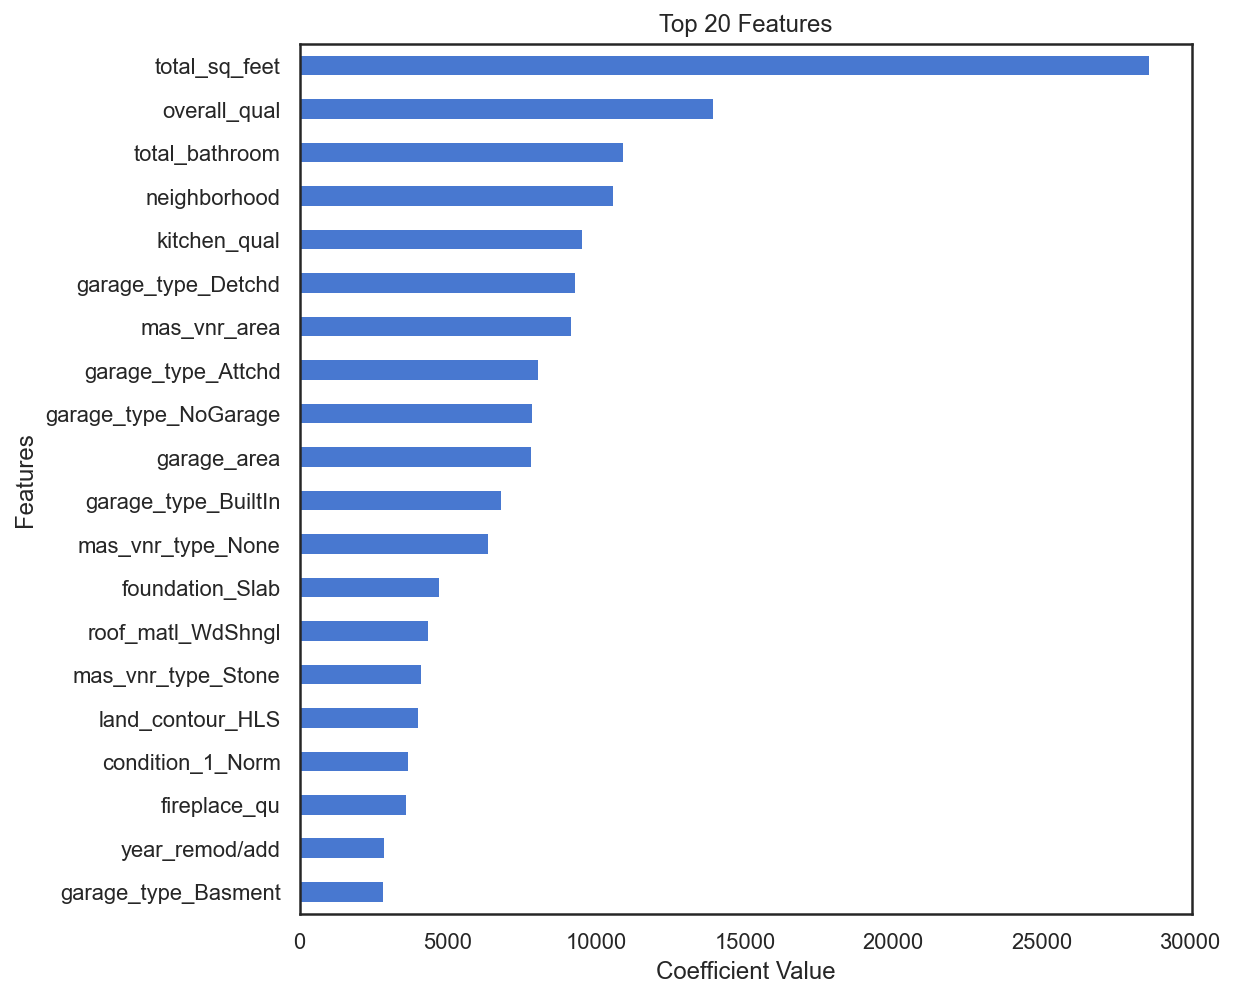

In [133]:
coef_df = pd.DataFrame({'coef': model_coef}, index=X_train.columns)
coef_df.sort_values(by='coef', inplace=True)

# Plot top 20 positive features
plt.figure(figsize=(8,8), facecolor='white')
coef_df['coef'].tail(20).plot(kind='barh')
plt.title('Top 20 Features')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')

Text(0, 0.5, 'Features')

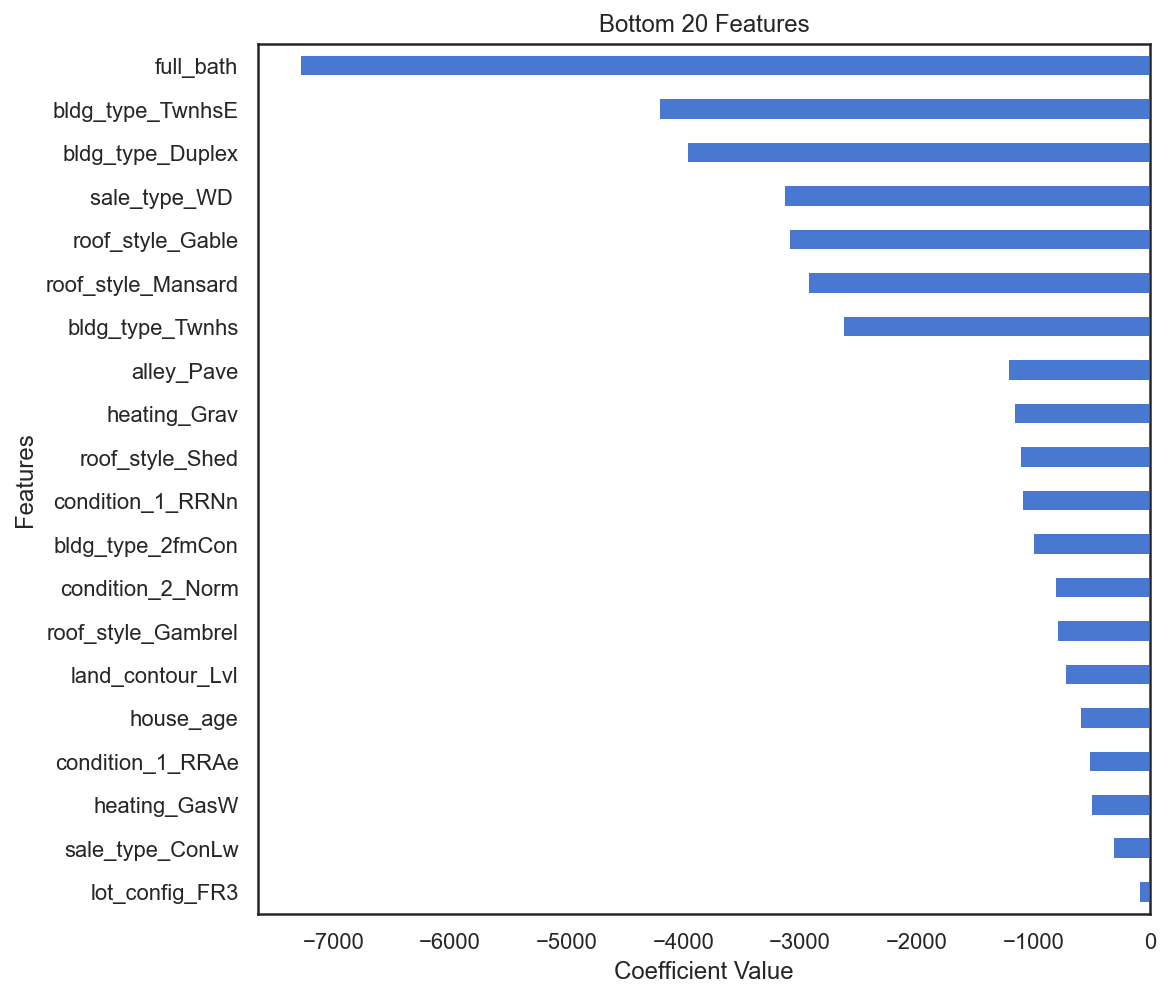

In [134]:
# Plot top 20 negative features
coef_df.sort_values(by='coef', ascending=False, inplace=True)
plt.figure(figsize=(8,8), facecolor='white')
coef_df['coef'].tail(20).plot(kind='barh')
plt.title('Bottom 20 Features')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')

In [135]:
np.sum((lasso.coef_ != 0))

69

In [136]:
#The starting point of the housing prices 
# print(model.intercept_)
print(lasso.intercept_)

182104.22635753508


### Predict target values

In [137]:
X_train.shape, X_kaggle.shape

((1639, 71), (878, 71))

In [138]:
y_preds = lasso.predict(X_kaggle_sc)

In [139]:
y_preds.mean()

181098.0835768979

In [140]:
X_kaggle.index

Int64Index([2658, 2718, 2414, 1989,  625,  333, 1327,  858,   95, 1568,
            ...
             337, 2765, 1746,  368, 2806, 1662, 1234, 1373, 1672, 1939],
           dtype='int64', name='id', length=878)

In [141]:
submission = pd.DataFrame(y_preds, columns = ['SalePrice']).set_index(X_kaggle.index)
submission.index.name = 'Id'
submission.head()

SalePrice
Id                 
2658  139803.047221
2718  178440.098032
2414  210035.966613
1989  117468.626856
625   188046.772467

In [142]:
#submission.to_csv('kaggle_submission_1.csv')

**Kaggle submission 1:** with more than 150 features

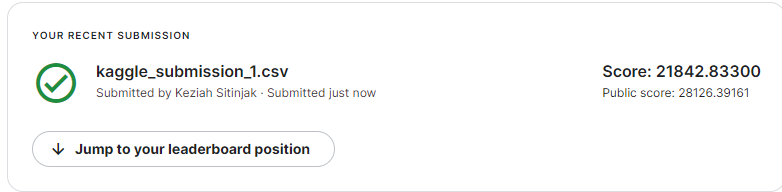

In [143]:
submission.to_csv('kaggle_submission_2.csv')

**Kaggle submission 2: with 71 features** (after removing highly correlated features and features with low to none variance)

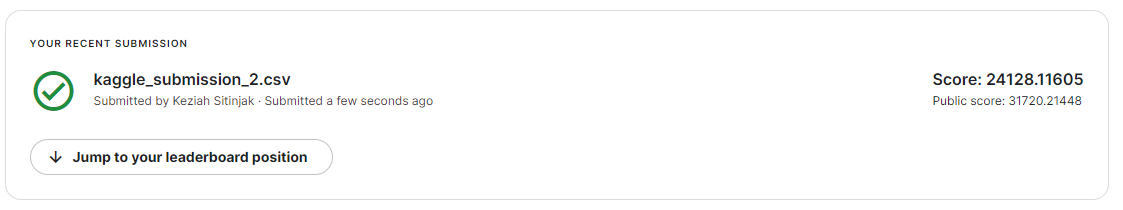

## Inferential Visualizations

#### Predicted vs Actual Sale Price

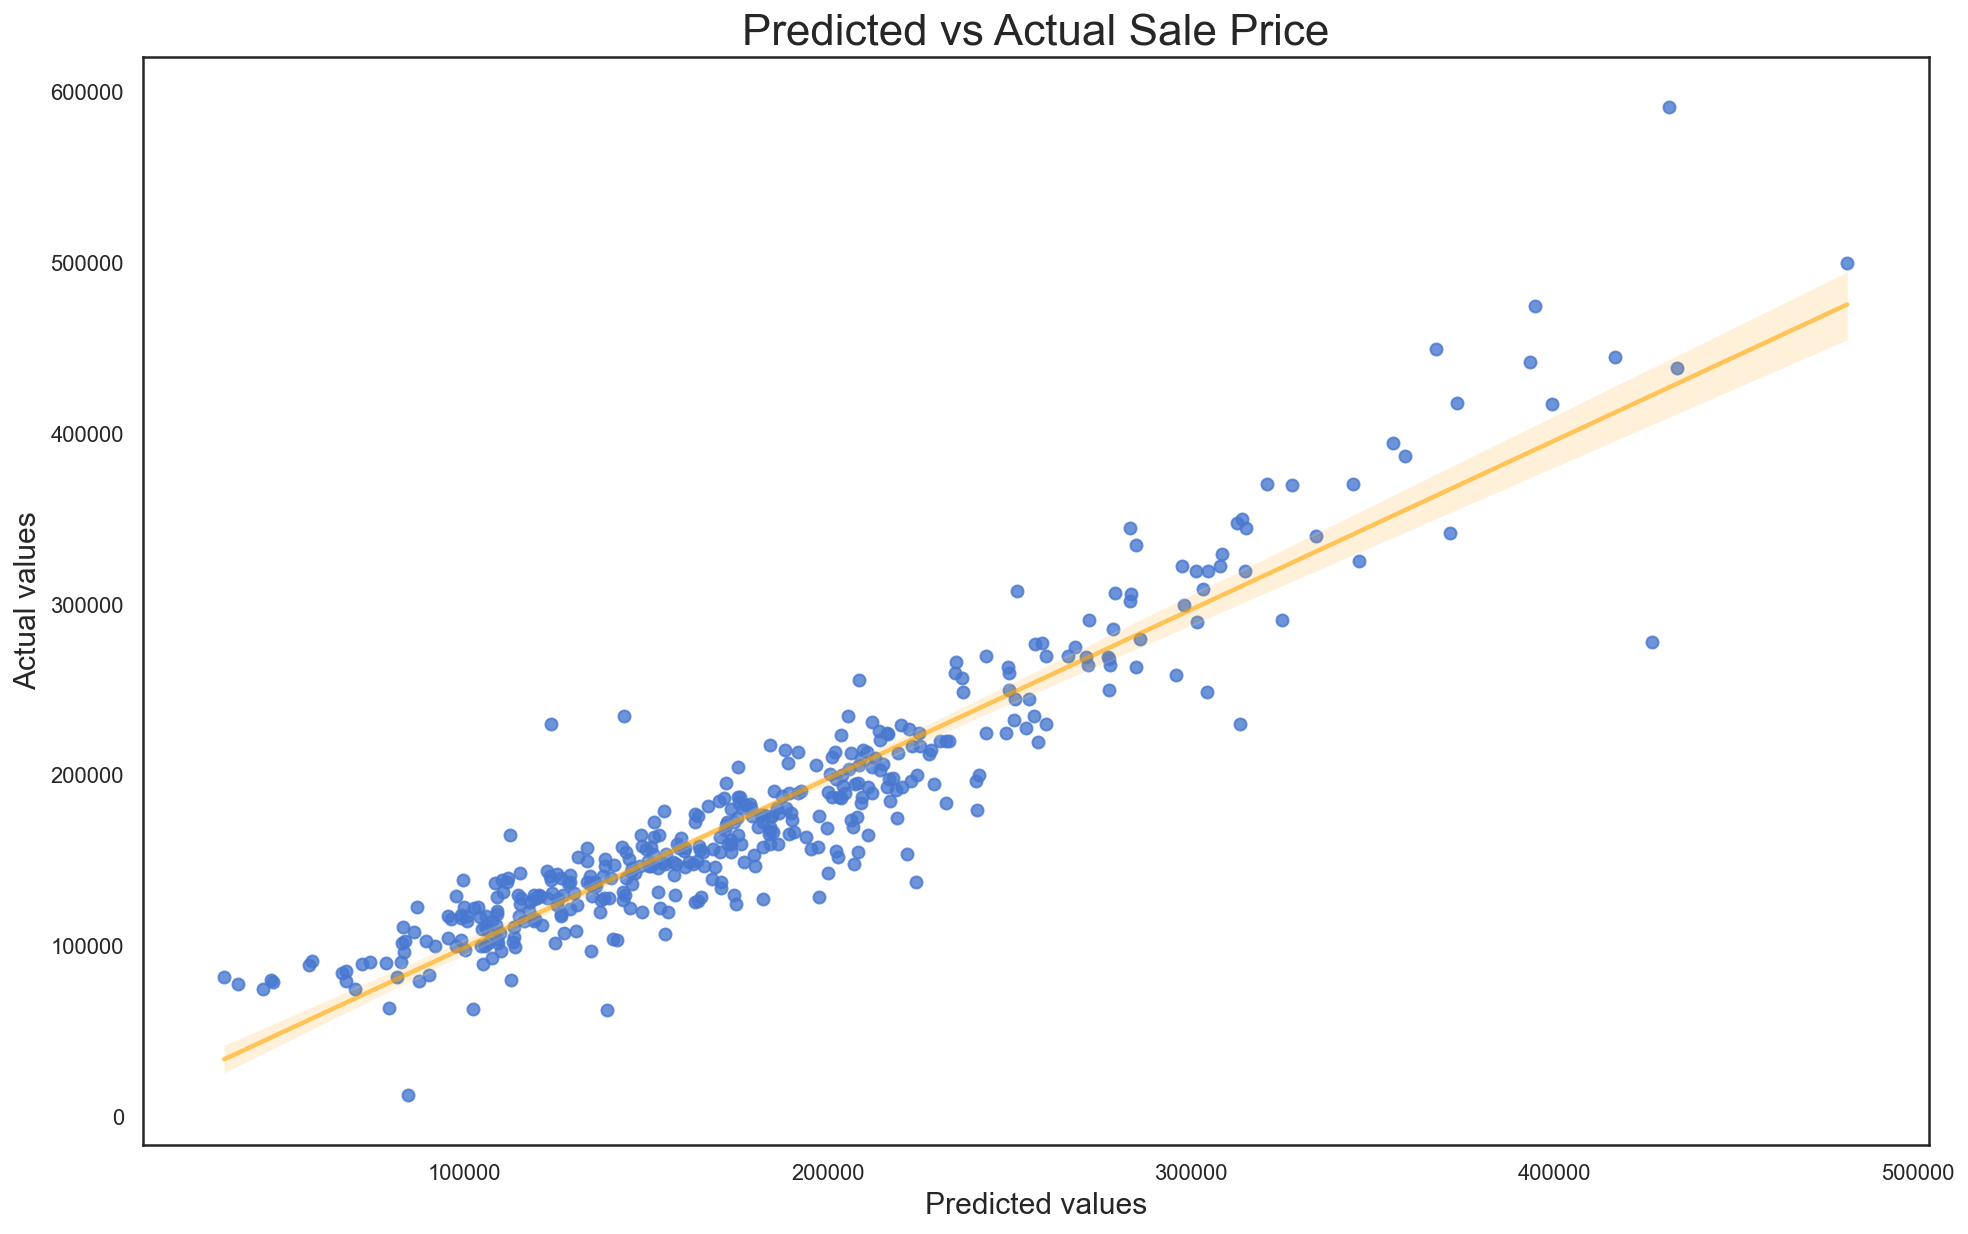

In [144]:
plt.figure(figsize=(16,10))
sns.regplot(x=lasso.predict(X_val_sc),y=y_val, line_kws={'color':'orange', 'alpha':0.6})
plt.title('Predicted vs Actual Sale Price', fontsize=22)
plt.xlabel('Predicted values', fontsize=15)
plt.ylabel('Actual values', fontsize=15);

In [145]:
#The plot shows a strong linear regression

#### Residual plots

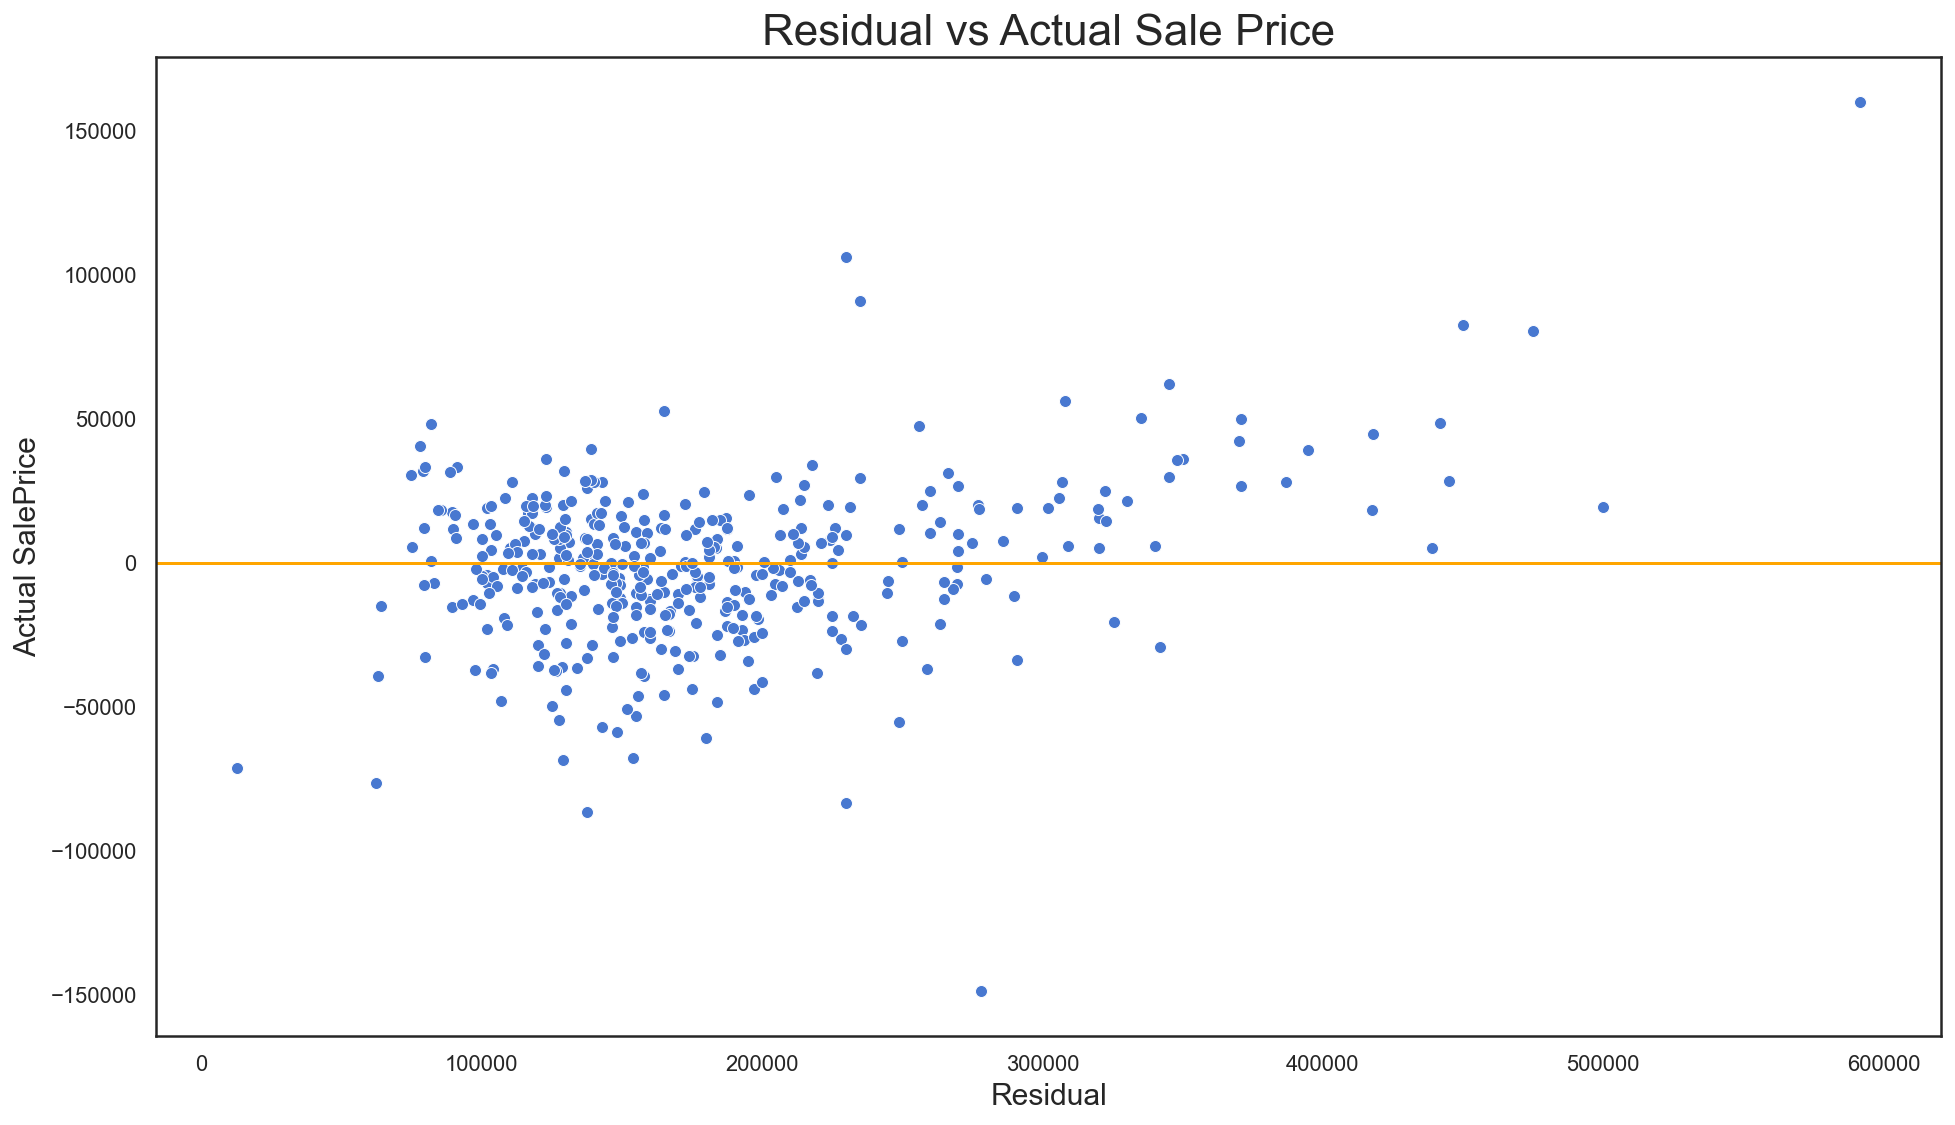

In [146]:
#Plotting the residuals
#Given the clustering on the graph's left side, it is not fully random.
residual = y_val - lasso.predict(X_val_sc)

plt.figure(figsize=(16,9))
sns.scatterplot(x=y_val, y=residual).axhline(xmin=0, xmax=max(y_train), color='orange')
plt.title('Residual vs Actual Sale Price', fontsize=22)
plt.xlabel('Residual', fontsize=15)
plt.ylabel('Actual SalePrice', fontsize=15);

C:\Users\kezia\anaconda3\envs\dsi30\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


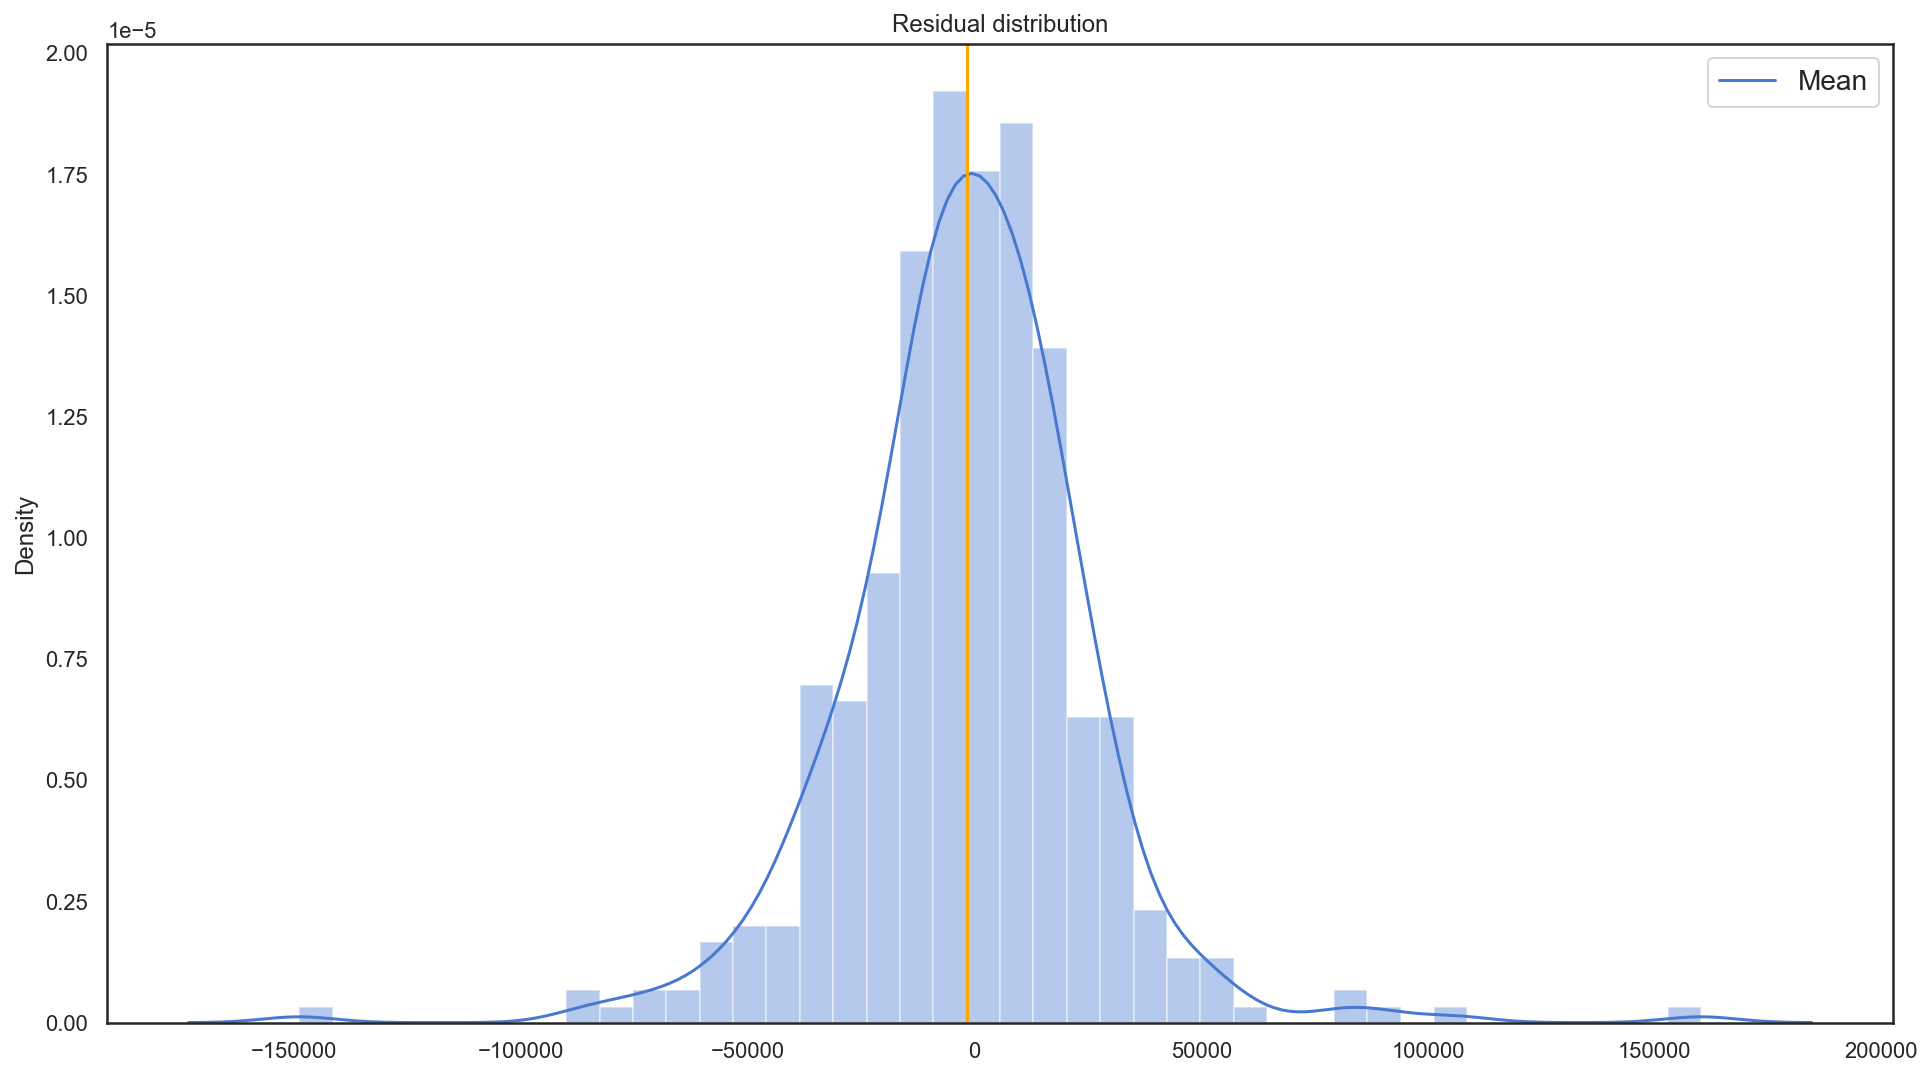

In [147]:
#Plotting the distribution of the residuals
plt.figure(figsize=(16,9))
sns.distplot(residual).axvline((residual).mean(), color='orange')
plt.title('Residual distribution')
plt.legend({'Mean': residual.mean()}, fontsize=14);

## 4. Business Recommendations

**Conclusion and Recommendations**
- Does the student provide appropriate context to connect individual steps back to the overall project?
- Is it clear how the final recommendations were reached?
- Are the conclusions/recommendations clearly stated?
- Does the conclusion answer the original problem statement?
- Does the student address how findings of this research can be applied for the benefit of stakeholders?
- Are future steps to move the project forward identified?

**Conclusion:**
We are able to predict the house price based on a variety of features using linear regression. Furthermore, it enables us to measure how strong of an influence a feature is on the house price.

- **Features that appear to add the most value to a home**

Text(0.5, 1.0, 'Ames Housing Heatmap')

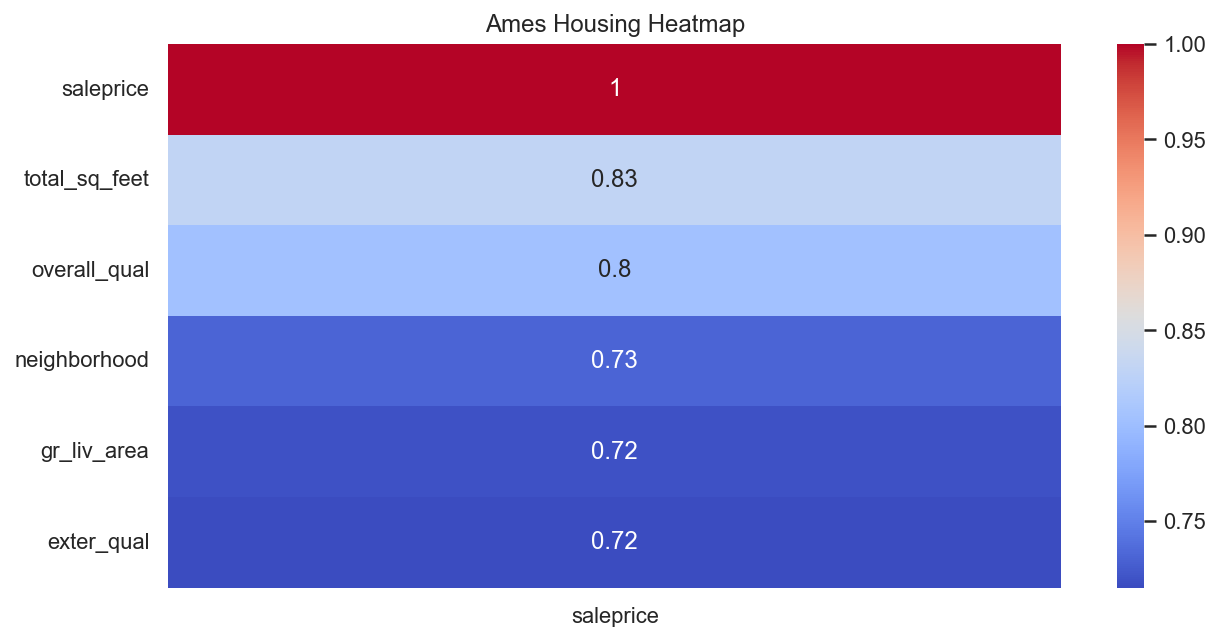

In [148]:
#plot heatmap to visualize the correlation between variables
plt.figure(figsize=(10,5))
sorted_corr = np.abs(train.corr()[['saleprice']]).sort_values('saleprice', ascending=False)
ax = sns.heatmap(sorted_corr.head(6), cmap='coolwarm', annot = True)
ax.set_title('Ames Housing Heatmap')

According to the heatmap above, the top features for predicting the price of a house are:<br>
    - Total square feet <br>
    - Overall quality <br>
    - Neighborhood

In [149]:
#Finding the coefficients of the lasso regression
lasso_coefs = pd.DataFrame({'variable':X_train.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

#Showing the lasso coefficents on the variables
lasso_coefs.head()

variable          coef      abs_coef
53   total_sq_feet  28649.335776  28649.335776
7     overall_qual  13956.972101  13956.972101
17  total_bathroom  10927.353209  10927.353209
8     neighborhood  10593.374372  10593.374372
58    kitchen_qual   9551.169017   9551.169017

In [150]:
#Top Predictors:
#1. total_sq_feet :  A 1 square foot increase in total house area will on average increase the house price by $28648 
#2. overall_qual : A 1 point increase in the overall quality will on average increase the house price by $13957 
#3. total_bathroom : An additional bathroom will increase the house price by $10927 
#4. neighborhood : A better neighborhood will on average increase the house price by $10593 
#5. kitchen_qual : A 1 point increase in the kitchen quality will on average increase the house price by $9550 

#### Features that hurt the value of a home the most

In [151]:
#Finding the coefficients of the lasso regression
lasso_coefs = pd.DataFrame({'variable':X_train.columns,
                            'coef':lasso.coef_})

lasso_coefs.sort_values('coef', inplace=True)

#Showing the lasso coefficents on the variables
lasso_coefs.head()

variable         coef
34         full_bath -7284.313872
44  bldg_type_TwnhsE -4207.597656
5   bldg_type_Duplex -3971.033151
63     sale_type_WD  -3140.275548
41  roof_style_Gable -3099.336192

In [152]:
#same as the top predictors above, here the coefficient shows the decrease in price, 
#when there is an increase in one unit variable

#### Things that homeowners could improve in their homes to increase the value**
- Improve the quality of kitchen by having complete furnishings
- Regular maintenance of the house to maintain its quality

#### Neighborhoods that seem like they might be a good investment
- Northridge Heights
- Stone Brook
- Northridge

#### Do you feel that this model will generalize to other cities?
It depends whether other cities have similar features but we definitely need to remove the features that are related to Ames city such as neighborhood-related features.

####  Further exploration

- Using automated feature selection
- Discover relationship between features
- Use more advanced machine learning tools
- Use more advanced imputation method
- Study negative correlation

**Reference:** <br>
- [How to Remove Outliers for Machine Learning?](https://medium.com/analytics-vidhya/how-to-remove-outliers-for-machine-learning-24620c4657e8#:~:text=If%20the%20outliers%20are%20non,and%20other%20statistical%20model%20assumptions.)